In [1]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import json

# Load the JSON file
with open('/content/gdrive/My Drive/VA_audio/asrOutput.json', 'r') as f:
    data = json.load(f)

# Extract the relevant information from the JSON file
segments = data['results']['speaker_labels']['segments']
rows = []
for segment in segments:
    start_time = float(segment['start_time'])/60
    end_time = float(segment['end_time'])/60
    speaker_label = segment['speaker_label']
    rows.append([start_time, end_time, speaker_label])

# Create a pandas dataframe from the extracted information
df = pd.DataFrame(rows, columns=['start_time', 'end_time', 'speaker_label'])

df.head(20)

KeyError: ignored

In [ ]:
df['start_time']=df['start_time'].astype(float)

In [ ]:
df['end_time']=df['end_time'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_time  954 non-null    object
 1   end_time    954 non-null    object
 2   text        954 non-null    object
dtypes: object(3)
memory usage: 22.5+ KB


In [ ]:
pip install webvtt-py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=a61d344289f4394460e2187e227327cb337c6f872c845754c6bcaa8a0ab72b19
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:

import webvtt

# Load the webvtt file
subtitles = webvtt.read('/content/gdrive/My Drive/VA_audio/Test-Transcribe.vtt')

# Initialize an empty list to store the captions
data = []

# Loop through the captions and extract the information
# Loop through the captions and extract the information
for subtitle in subtitles:
    start_time = subtitle.start.split(':')
    end_time = subtitle.end.split(':')
    
    # Convert start and end time to minutes
    start_minutes = int(start_time[0])*60 + int(start_time[1]) + float(start_time[2])/60
    end_minutes = int(end_time[0])*60 + int(end_time[1]) + float(end_time[2])/60
    
    text = subtitle.text.strip()
    
    # Append the information to the data list
    data.append((start_minutes, end_minutes, text))


# Create a pandas dataframe from the data list
titles = pd.DataFrame(data, columns=['start_time', 'end_time', 'text'])


In [ ]:
titles['start_time']=titles['start_time'].astype(float)

In [ ]:
titles['end_time']=titles['end_time'].astype(float)

In [ ]:
titles.head(90)

,start_time,end_time,text
0,0.000150,0.083500,How do I defend myself and my Children against...
1,0.083650,0.128983,And you said to yourself that the police may n...
2,0.129167,0.135000,"-- Tell\n-- me,"
3,0.135150,0.189983,you know what the best chance you got in a sit...
4,0.190150,0.203983,She just stated that
...,...,...,...
85,3.951483,4.004317,the only thing that would have stopped her fro...
86,4.004467,4.058633,-- How\n-- does the second amendment affected ...
87,4.058817,4.107300,view gun ownership as a right in this country?
88,4.107483,4.176300,I think my right to defend myself how I fit co...


In [ ]:
import pandas as pd



# Merge the two tables based on start_time
merged = pd.merge_asof(titles.sort_values('start_time'), df.sort_values('start_time'), on='start_time', direction='backward')

# Drop rows with NaN values in the speaker_label column
merged = merged.dropna(subset=['speaker_label'])

# Rename the columns
merged = merged[['start_time', 'end_time_x', 'speaker_label', 'text']]
merged.columns = ['start_time', 'end_time', 'speaker_label', 'text']

# Reset the index
merged = merged.reset_index(drop=True)

# Print the merged table
print(merged)
merged.head(20)

     start_time   end_time speaker_label  \
0      0.000150   0.083500         spk_0   
1      0.083650   0.128983         spk_0   
2      0.129167   0.135000         spk_0   
3      0.135150   0.189983         spk_1   
4      0.190150   0.203983         spk_1   
..          ...        ...           ...   
949   43.110983  43.177317         spk_1   
950   43.177483  43.226500         spk_2   
951   43.226667  43.275500         spk_3   
952   43.280333  43.327817         spk_3   
953   43.327983  43.378983         spk_8   

                                                  text  
0    How do I defend myself and my Children against...  
1    And you said to yourself that the police may n...  
2                                      -- Tell\n-- me,  
3    you know what the best chance you got in a sit...  
4                                 She just stated that  
..                                                 ...  
949  -- of the same answers that I heard from folks...  
950  I think at

,start_time,end_time,speaker_label,text
0,0.000150,0.083500,spk_0,How do I defend myself and my Children against...
1,0.083650,0.128983,spk_0,And you said to yourself that the police may n...
2,0.129167,0.135000,spk_0,"-- Tell\n-- me,"
3,0.135150,0.189983,spk_1,you know what the best chance you got in a sit...
4,0.190150,0.203983,spk_1,She just stated that
5,0.220333,0.220483,spk_1,a
6,0.224500,0.264483,spk_1,piece that's 90 rounds of bullets firing throu...
7,0.277150,0.329833,spk_1,"-- You need to get out of the house.\n-- Oh, I..."
8,0.484650,0.531483,spk_2,Thank you all for coming today. My name is Kee...
9,0.531650,0.559150,spk_2,I'm a correspondent with Vice News.


In [ ]:
merged.to_csv('/content/gdrive/My Drive/VA_audio/transcript.csv')

In [ ]:
import requests
import json
import time

In [ ]:
base_url = "https://api.assemblyai.com/v2"

headers = {
    "authorization": "097fb73899464abf8e6a504aed09519a" 
}

In [ ]:
with open("/content/gdrive/My Drive/VA_audio/debate.wav" , "rb") as f:
  response = requests.post(base_url + "/upload",
                          headers=headers,
                          data=f)

upload_url = response.json()["upload_url"]

/usr/lib/python3.10/json/encoder.py:257: RuntimeWarning: coroutine 'cleaned_docs_to_vectorize' was never awaited
  return _iterencode(o, 0)


In [ ]:
upload_url

'https://cdn.assemblyai.com/upload/3a648bc7-a963-4018-84d1-193dd79cb9ff'

In [ ]:
headers = {
    'authorization':'097fb73899464abf8e6a504aed09519a', 
    'content-type': 'application/json',
}


transcription_endpoint = "https://api.assemblyai.com/v2/transcript"

input_url = "https://cdn.assemblyai.com/upload/3a648bc7-a963-4018-84d1-193dd79cb9ff"

In [ ]:
def post_transcription_request(input_url): 

    json = {"audio_url": upload_url, "iab_categories": True,'sentiment_analysis': 'True'}
    
    response = requests.post(transcription_endpoint, json=json, headers=headers)
    transcription_id = response.json()['id']

    return transcription_id

In [ ]:
def get_transcription_result(transcription_id): 

    current_status = "queued"

    endpoint = f"https://api.assemblyai.com/v2/transcript/{transcription_id}"

    while current_status not in ("completed", "unavailable"):
        
        response = requests.get(endpoint, headers=headers)
        current_status = response.json()['status']
        
        if current_status in ("completed", "unavailable"):
            return response.json()
        else:
            time.sleep(10)

In [ ]:
transcription_id = post_transcription_request(input_url)

results = get_transcription_result(transcription_id)

In [ ]:
results

{'id': '6gx4rmdgah-7797-45c6-9882-4a284e5e5a46',
 'language_model': 'assemblyai_default',
 'acoustic_model': 'assemblyai_default',
 'language_code': 'en_us',
 'status': 'completed',
 'audio_url': 'https://cdn.assemblyai.com/upload/3a648bc7-a963-4018-84d1-193dd79cb9ff',
 'text': "How do I defend myself and my children against two guys who have AR 15s? Tell me how. And you said yourself that the police may not make it there in time. Tell me. You know what the best chance you got in a situation like that is to get out the house. She just stated that they reach her piece. That's 90 rounds of bullets firing through the hall. You need to get out of the house. Oh, sir, I stand my ground. Sorry, it's thank you all for coming today. My name is Keegan Hamilton. I'm a correspondent with Vice News. Obviously, we couldn't get somebody to represent every single perspective on this, but we've tried to get across the range here, and we're here today to talk about guns. It's a polarizing topic. It can 

In [ ]:
results['sentiment_analysis_results']

[{'text': 'How do I defend myself and my children against two guys who have AR 15s?',
  'start': 90,
  'end': 4334,
  'sentiment': 'NEGATIVE',
  'confidence': 0.771380603313446,
  'speaker': None},
 {'text': 'Tell me how.',
  'start': 4372,
  'end': 4990,
  'sentiment': 'NEUTRAL',
  'confidence': 0.6736916899681091,
  'speaker': None},
 {'text': 'And you said yourself that the police may not make it there in time.',
  'start': 5060,
  'end': 7774,
  'sentiment': 'NEGATIVE',
  'confidence': 0.5835495591163635,
  'speaker': None},
 {'text': 'Tell me.',
  'start': 7812,
  'end': 8174,
  'sentiment': 'NEUTRAL',
  'confidence': 0.7080521583557129,
  'speaker': None},
 {'text': 'You know what the best chance you got in a situation like that is to get out the house.',
  'start': 8212,
  'end': 11422,
  'sentiment': 'NEUTRAL',
  'confidence': 0.4799546003341675,
  'speaker': None},
 {'text': 'She just stated that they reach her piece.',
  'start': 11476,
  'end': 13854,
  'sentiment': 'NEUTRAL

In [ ]:
results['iab_categories_result']['sentiment_analysis']

KeyError: ignored

In [ ]:
results['iab_categories_result']['sentiment_analysis']

{'status': 'success',
 'results': [{'text': "How do I defend myself and my children against two guys who have AR 15s? Tell me how. And you said yourself that the police may not make it there in time. Tell me. You know what the best chance you got in a situation like that is to get out the house. She just stated that they reach her piece. That's 90 rounds of bullets firing through the hall. You need to get out of the house. Oh, sir, I stand my ground.",
   'labels': [{'relevance': 0.05674426257610321,
     'label': 'Sports>ExtremeSports>Paintball'},
    {'relevance': 0.009362570941448212, 'label': 'Home&Garden>HomeSecurity'},
    {'relevance': 0.0025507595855742693, 'label': 'Sports>HuntingAndShooting'},
    {'relevance': 0.002503225114196539, 'label': 'NewsAndPolitics>Crime'},
    {'relevance': 0.0019947951659560204,
     'label': 'NewsAndPolitics>Politics>WarAndConflicts'},
    {'relevance': 0.0016617024084553123,
     'label': 'MedicalHealth>DiseasesAndConditions>Injuries>FirstAid'},

In [ ]:
import pandas as pd
summary_df = pd.DataFrame(columns = ["Label_ID", "Topic_Label", "Relevance"])

for idx, (key, value) in enumerate(results['iab_categories_result']['summary'].items()):

    summary_df.loc[summary_df.shape[0]] = [idx+1, key, round(value, 2)]

summary_df.head()

,Label_ID,Topic_Label,Relevance
0,1,NewsAndPolitics>Crime,1.00
1,2,NewsAndPolitics>Politics>WarAndConflicts,0.22
2,3,MedicalHealth>DiseasesAndConditions>MentalHealth,0.20
3,4,Sports>ExtremeSports>Paintball,0.11
4,5,Sports>HuntingAndShooting,0.05


In [ ]:
pip install deepgram-sdk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.8 MB/s eta 0:00:00


In [ ]:
pip install python-dotenv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
DEEPGRAM_AP_KEY="318b31cc0f3157a2c58a9f134c7d226143e8bdfe"

In [ ]:
from ast import keyword
from posixpath import split
from deepgram import Deepgram
from dotenv import load_dotenv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import asyncio
import json
import os
import nltk


load_dotenv()

False

In [ ]:
async def transcribe_with_deepgram():
  # Initializes the Deepgram SDK
  deepgram = Deepgram(os.getenv("DEEPGRAM_API_KEY"))
  # Open the audio file
  with open("/content/gdrive/My Drive/VA_audio/debate.wav", 'rb') as audio:
      # ...or replace mimetype as appropriate
      source = {'buffer': audio, 'mimetype': 'audio/mp3'}
      response = await deepgram.transcription.prerecorded(source)

      if 'transcript' in response['results']['channels'][0]['alternatives'][0]:
          transcript = response['results']['channels'][0]['alternatives'][0]['transcript']

          return transcript

In [ ]:
async def remove_stop_words():
  transcript_text = await transcribe_with_deepgram()
  words = transcript_text.split()
  final = []

  nltk.download('stopwords')
  stops = stopwords.words('english')

  for word in words:
      if word not in stops:
          final.append(word)

  final = " ".join(final)

  return final




In [ ]:
async def cleaned_docs_to_vectorize():
  final_list = []
  transcript_final = await remove_stop_words()

  split_transcript = transcript_final.split()

  vectorizer = TfidfVectorizer(
                              lowercase=True,
                              max_features=100,
                              max_df=0.8,
                              min_df=4,
                              ngram_range=(1,3),
                              stop_words='english'

                          )


  vectors = vectorizer.fit_transform(split_transcript)

  feature_names = vectorizer.get_feature_names()

  dense = vectors.todense()
  denselist = dense.tolist()

  all_keywords = []

  for description in denselist:
      x = 0
      keywords = []
      for word in description:
          if word > 0:
              keywords.append(feature_names[x])
          x=x+1

      [all_keywords.append(x) for x in keywords if x not in all_keywords]
  topic = "\n".join(all_keywords)
  print(topic)

  k = 5

  model = KMeans(n_clusters=k, init="k-means++", max_iter=100, n_init=1)

  model.fit(vectors)

  centroids = model.cluster_centers_.argsort()[:, ::-1]

  terms = vectorizer.get_feature_names()
  with open("results.txt", "w", encoding="utf-8") as f:
      for i in range(k):
          f.write(f"Cluster {i}")
          f.write("\n")
          for ind in centroids[i, :10]:
              f.write(' %s' % terms[ind],)
              f.write("\n")
          f.write("\n")
          f.write("\n")



RuntimeError: ignored

RuntimeError: ignored

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# example text
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
##How does shooting a gun make you feel? 
text = "I feel powerful.I feel confident. Fun is pretty much what I'm thinking about and what I'm feeling when I'm shooting a gun. It's a good time. It's like Spider Man. With great power comes great responsibility. Facts, determined, I guess. When I pick up a gun loaded not loaded. Am I shooting? Am I shooting responsibly? It's always been a very neutral experience for me because of things like that, where it's just about doing everything correctly. I usually feel tired after shooting a lot. A lot of the training is extensive. And as an instructor, I'm usually also teaching while I'm shooting firearms. If shooting a gun is exhausting, like teaching people to shoot guns is even more exhausting. But it's exciting because you can empower somebody else after it. You may feel tired and exhausted, but these people might be that much safer because of what you taught them. How many of you all are longtime gun owners? Raise your hands. And how many are new gun owners who've just got into gun ownership and shooting? Okay. I grew up around them, but I recently moved somewhere where I could personally own them. I started closer to 2018, 2019, when I just turned 18 years old and was legally allowed to buy guns. I did not grow up around guns. I started owning them because of different political conditions that we were under. I think the reason why I don't own a gun, even though it always felt like a given, I grew up in San Antonio, and as a first generation American, growing up, I wanted to be a good American. I wanted to observe what everyone else was doing and be like, okay, that's how you be an American. That's how you do it. But then I went out to a really big defensive shooting training. It's like 1000 browns over a weekend, lots of pressure exercises. And I was like, this is a whole lifestyle that I'm not willing to take up. Can we talk about why you guys chose to own guns? Law enforcement similar. I'm military or former military and carried a handgun concealed while I was deployed at 19. I grew up in rural Virginia, and so for us, it was more of tradition. The first firearm I received or owned was the first firearm my father owned, which was a hunting rifle. And so for us, we were taught to take care of it, appreciate it, but know that it has a place. My dad grew up in rural Pennsylvania, so, I mean, he was shooting his whole life. He hunted, and so he thought it was important for us to learn pretty young kind of about guns and how they work. When I was growing up, it was always the bad guys that had guns, and I felt like I didn't have the emotional maturity at that time to own guns. But as I got older, I started seeing it more as recreation. And then as the climate in the world changed and events happened in my life, I started to really be empowered by the security that they offered for me. Well, I actually used to be a gun control activist, and there were certain events that were happening where violence against trans women was increasing across the country. And there was this one video that went viral where a trans woman was violently mobbed in a gas station one night. And that was a clicking moment for me. At that moment, I was like, you know what? The only thing that would have stopped her from this violent mob was, in fact, the gun. How does the second amendment affect the way that you view gun ownership as a right in this country? I think my right to defend myself how I see fit comes from my creator, not the second amendment. A lot of people hinge on the second amendment and the verbiage, and we dissect it and we try to interpret it, but ultimately, every person on this planet was born with the right to defend themselves. I don't have any skin in the game. I don't own guns. So as far as two a goes, I do not feel like that is a right that I personally want to protect or defend. I feel very conflicted about the second amendment. At the end of the day, when we talk about the constitution as like, this sacred document, I mean, it was written by a bunch of rich white guys who owned slaves, didn't let women vote, and thought the electoral college was a good idea. So maybe it's not a perfect document, and we should kind of update it as time progresses. It's my right to defend myself. There is an ample amount of time between the time you call the police and the time that they arrived. It's my right to be able to protect myself in any way possible. As a survivor of gun violence, I can't help but to think about how many people have been lost because of this perceived right or this outdated document. I feel like this debate around the Second Amendment is oversimplifying a really serious and complex issue. And unfortunately, there's too many privileged individuals having these debates, making these decisions who aren't feeling the pain of what gun violence in our country has done to us. In Connecticut, two officers were shot and killed. One guy is firing 80 rounds. One guy I don't know if those two cops combined had 80 rounds. Now, I don't know how else they would have defended themselves other than a firearm. But it also comes out to who gets it out first. Personally, forget law enforcement. I have a four and a half year old son. I want to have a chance that, God forbid, I'm in a store and I see somebody down an aisle or I hear a sound that sounds like a firearm, that there's a good chance that at least my son's going to survive. We're in a world where we are literally out arming who's supposed to be protecting us, and it's all coming from a place of fear. If we're thinking about how to protect our homes or to protect our families, there are better, lower risk ways to do that. And as someone who's been shot, having a gun on me would have not saved my life. If anything, it would have cost me my life. Because it gives you this false concept of confidence. In a life or death situation when your first instinct should be to flee or evade, what are your ideas about other cost effective ways to defend yourself? Well, when we think about defending your home or your body or from harm or assault, the most impactful thing you can have is a known deterrent. A gun is not a known deterrent. And so when we think about keeping our homes safe, specifically simple things like having a dog, having the lights on, having a fence, having a security system, a security camera is more effective at protecting your home. What do you guys think are actual good ideas in terms of gun regulation, if any? What? The question I have is, are we going after the guns or are we going after the people that are using them illegally? The second something happens, they don't talk about the person that committed the crime, but if someone's not on the opposite side of the gun, it will never go off unless the trigger is pulled. And I think there needs to be more accountability, whether legally or not legally used. There needs to be accountability for people to say, wait a minute. If I do something really dumb with this or hurt somebody, I might not see the light of day for a while. We've created this image in America, and I partially blame the media that violence in black communities is a result of criminal activity when in reality, most situations are interpersonal conflicts that are not connected to another felony. And that false sense of having a firearm will make me safer. Turns what would have been a fistfight, an argument into something that causes someone their life. You move your finger and you end the human life. That's a responsibility that we should take a lot more seriously in this country. You get convicted of domestic violence, no guns for you. Universal background checks, I think, would be a great idea. And I think the idea that we don't treat something that was created for killing people with that kind of respect is a really weird disconnect in this country. I think a big problem with people have with universal background checks requiring regulation and accreditation. I teach and I give out certificates and all that, but states have been sued for the fact that they won't give it to Vipoc. They won't give it to poor people. They won't give these rights to trans people. You start denying these rights and like, oh, well, we regulate this, but we only give it to the rich, and we only give it to the well connected, right? And then on the other side, we don't make education available to all these people that can't afford it. Why isn't it free? Why can't you go down to city hall and take a class on how to teach your kids about firearm safety? Kind of gotten rid of all of that. We've kind of moved to an abstinence only education culture. If you have someone in your community who commits a crime, it's the community's fault. Like, how did that person get to that point? "

# initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Tokenize the transcript into individual words
tokens = nltk.word_tokenize(text)

# Remove stop words from the token list
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Perform sentiment analysis on the filtered transcript
c

# Generate a word count vector for the filtered transcript
count_vectorizer = CountVectorizer()
word_count_vector = count_vectorizer.fit_transform([' '.join(filtered_tokens)])
print('Word Count Vector:')
print(count_vectorizer.get_feature_names_out())
print(word_count_vector.toarray())

# Generate an IDF vector for the filtered transcript
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform([' '.join(filtered_tokens)])
print('TF-IDF Vector:')
print(tfidf_vectorizer.get_feature_names_out())
print(tfidf_vector.toarray())



Sentiment Analysis Scores:
Positive: 0.21
Neutral: 0.61
Negative: 0.17
Word Count Vector:
['1000' '18' '19' '2018' '2019' '80' 'able' 'abstinence' 'accountability'
 'accreditation' 'across' 'activist' 'activity' 'actual' 'actually'
 'affect' 'afford' 'aisle' 'allowed' 'also' 'always' 'amendment' 'america'
 'american' 'amount' 'ample' 'another' 'antonio' 'anything' 'appreciate'
 'argument' 'arming' 'around' 'arrived' 'assault' 'available' 'background'
 'bad' 'better' 'big' 'black' 'blame' 'body' 'born' 'browns' 'bunch' 'buy'
 'ca' 'call' 'camera' 'care' 'carried' 'causes' 'certain' 'certificates'
 'chance' 'changed' 'checks' 'chose' 'city' 'class' 'clicking' 'climate'
 'closer' 'college' 'combined' 'comes' 'coming' 'commits' 'committed'
 'communities' 'community' 'complex' 'concealed' 'concept' 'conditions'
 'confidence' 'confident' 'conflicted' 'conflicts' 'connected'
 'connecticut' 'constitution' 'control' 'convicted' 'cops' 'correctly'
 'cost' 'could' 'country' 'created' 'creator' 'c

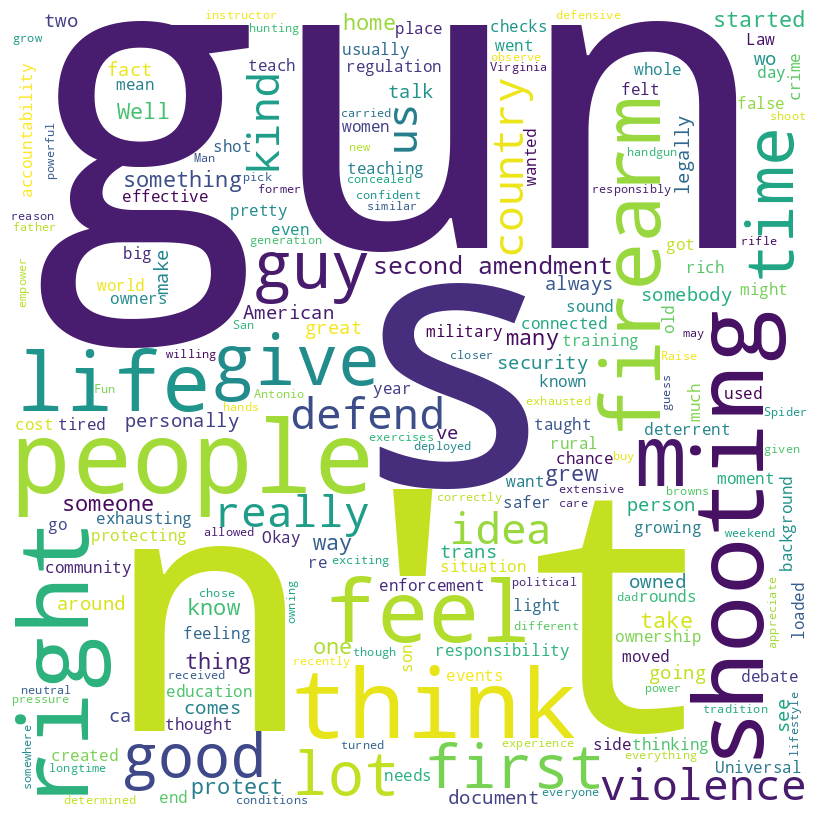

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
#word_frequencies = dict(Counter(word_count_vector))
filtered_text=' '.join(filtered_tokens)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
filtered_text

"shooting gun make feel ? feel powerful.I feel confident . Fun pretty much 'm thinking 'm feeling 'm shooting gun . 's good time . 's like Spider Man . great power comes great responsibility . Facts , determined , guess . pick gun loaded loaded . shooting ? shooting responsibly ? 's always neutral experience things like , 's everything correctly . usually feel tired shooting lot . lot training extensive . instructor , 'm usually also teaching 'm shooting firearms . shooting gun exhausting , like teaching people shoot guns even exhausting . 's exciting empower somebody else . may feel tired exhausted , people might much safer taught . many longtime gun owners ? Raise hands . many new gun owners 've got gun ownership shooting ? Okay . grew around , recently moved somewhere could personally . started closer 2018 , 2019 , turned 18 years old legally allowed buy guns . grow around guns . started owning different political conditions . think reason n't gun , even though always felt like give

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Define the list of topics
topics = [
    "I feel confident. Fun is pretty much what I'm thinking about and what I'm feeling when I'm shooting a gun. It's a good time. It's like Spider Man. With great power comes great responsibility. Facts, determined, I guess. When I pick up a gun loaded not loaded. Am I shooting? Am I shooting responsibly? It's always been a very neutral experience for me because of things like that, where it's just about doing everything correctly. I usually feel tired after shooting a lot. A lot of the training is extensive. And as an instructor, I'm usually also teaching while I'm shooting firearms. If shooting a gun is exhausting, like teaching people to shoot guns is even more exhausting. But it's exciting because you can empower somebody else after it. You may feel tired and exhausted, but these people might be that much safer because of what you taught them. How many of you all are longtime gun owners? Raise your hands. And how many are new gun owners who've just got into gun ownership and shooting? Okay. I grew up around them, but I recently moved somewhere where I could personally own them. I started closer to 2018, 2019, when I just turned 18 years old and was legally allowed to buy guns. I did not grow up around guns. I started owning them because of different political conditions that we were under. I think the reason why I don't own a gun, even though it always felt like a given, I grew up in San Antonio, and as a first generation American, growing up, I wanted to be a good American. I wanted to observe what everyone else was doing and be like, okay, that's how you be an American. That's how you do it. But then I went out to a really big defensive shooting training. It's like 1000 browns over a weekend, lots of pressure exercises. And I was like, this is a whole lifestyle that I'm not willing to take up. Can we talk about why you guys chose to own guns? Law enforcement similar. I'm military or former military and carried a handgun concealed while I was deployed at 19. I grew up in rural Virginia, and so for us, it was more of tradition. The first firearm I received or owned was the first firearm my father owned, which was a hunting rifle. And so for us, we were taught to take care of it, appreciate it, but know that it has a place. My dad grew up in rural Pennsylvania, so, I mean, he was shooting his whole life. He hunted, and so he thought it was important for us to learn pretty young kind of about guns and how they work. When I was growing up, it was always the bad guys that had guns, and I felt like I didn't have the emotional maturity at that time to own guns. But as I got older, I started seeing it more as recreation. And then as the climate in the world changed and events happened in my life, I started to really be empowered by the security that they offered for me. Well, I actually used to be a gun control activist, and there were certain events that were happening where violence against trans women was increasing across the country. And there was this one video that went viral where a trans woman was violently mobbed in a gas station one night. And that was a clicking moment for me. At that moment, I was like, you know what? The only thing that would have stopped her from this violent mob was, in fact, the gun. How does the second amendment affect the way that you view gun ownership as a right in this country? I think my right to defend myself how I see fit comes from my creator, not the second amendment. A lot of people hinge on the second amendment and the verbiage, and we dissect it and we try to interpret it, but ultimately, every person on this planet was born with the right to defend themselves. I don't have any skin in the game. I don't own guns. So as far as two a goes, I do not feel like that is a right that I personally want to protect or defend. I feel very conflicted about the second amendment. At the end of the day, when we talk about the constitution as like, this sacred document, I mean, it was written by a bunch of rich white guys who owned slaves, didn't let women vote, and thought the electoral college was a good idea. So maybe it's not a perfect document, and we should kind of update it as time progresses. It's my right to defend myself. There is an ample amount of time between the time you call the police and the time that they arrived. It's my right to be able to protect myself in any way possible. As a survivor of gun violence, I can't help but to think about how many people have been lost because of this perceived right or this outdated document. I feel like this debate around the Second Amendment is oversimplifying a really serious and complex issue. And unfortunately, there's too many privileged individuals having these debates, making these decisions who aren't feeling the pain of what gun violence in our country has done to us. In Connecticut, two officers were shot and killed. One guy is firing 80 rounds. One guy I don't know if those two cops combined had 80 rounds. Now, I don't know how else they would have defended themselves other than a firearm. But it also comes out to who gets it out first. Personally, forget law enforcement. I have a four and a half year old son. I want to have a chance that, God forbid, I'm in a store and I see somebody down an aisle or I hear a sound that sounds like a firearm, that there's a good chance that at least my son's going to survive. We're in a world where we are literally out arming who's supposed to be protecting us, and it's all coming from a place of fear. If we're thinking about how to protect our homes or to protect our families, there are better, lower risk ways to do that. And as someone who's been shot, having a gun on me would have not saved my life. If anything, it would have cost me my life. Because it gives you this false concept of confidence. In a life or death situation when your first instinct should be to flee or evade, what are your ideas about other cost effective ways to defend yourself? Well, when we think about defending your home or your body or from harm or assault, the most impactful thing you can have is a known deterrent. A gun is not a known deterrent. And so when we think about keeping our homes safe, specifically simple things like having a dog, having the lights on, having a fence, having a security system, a security camera is more effective at protecting your home. What do you guys think are actual good ideas in terms of gun regulation, if any? What? The question I have is, are we going after the guns or are we going after the people that are using them illegally? The second something happens, they don't talk about the person that committed the crime, but if someone's not on the opposite side of the gun, it will never go off unless the trigger is pulled. And I think there needs to be more accountability, whether legally or not legally used. There needs to be accountability for people to say, wait a minute. If I do something really dumb with this or hurt somebody, I might not see the light of day for a while. We've created this image in America, and I partially blame the media that violence in black communities is a result of criminal activity when in reality, most situations are interpersonal conflicts that are not connected to another felony. And that false sense of having a firearm will make me safer. Turns what would have been a fistfight, an argument into something that causes someone their life. You move your finger and you end the human life. That's a responsibility that we should take a lot more seriously in this country. You get convicted of domestic violence, no guns for you. Universal background checks, I think, would be a great idea. And I think the idea that we don't treat something that was created for killing people with that kind of respect is a really weird disconnect in this country. I think a big problem with people have with universal background checks requiring regulation and accreditation. I teach and I give out certificates and all that, but states have been sued for the fact that they won't give it to Vipoc. They won't give it to poor people. They won't give these rights to trans people. You start denying these rights and like, oh, well, we regulate this, but we only give it to the rich, and we only give it to the well connected, right? And then on the other side, we don't make education available to all these people that can't afford it. Why isn't it free? Why can't you go down to city hall and take a class on how to teach your kids about firearm safety? Kind of gotten rid of all of that. We've kind of moved to an abstinence only education culture. If you have someone in your community who commits a crime, it's the community's fault. Like, how did that person get to that point?",
    "Shit is so bleak in America. Like, I don't blame people for feeling unsafe. Everyone here is concerned with survival. Everyone who picks up a gun is concerned with survival. There is a sense of despair in America when it comes to resource scarcity, food scarcity, housing scarcity, scarcity of care. People do not resort to terrible things when they have support, when they have a community, when they feel like their survival is not at stake. In America, the two solutions that are introduced are too heavily focused on the individual and the gun. But a solution we never introduce is regulating the gun industry and the profiteers of massive amount of weapons being introduced into America. And I think that's something that in America, we're not talking about. We're not talking about how do we hold the profiteers, the gun capitalists accountable. In this conversation, we forget to talk about white nationalism and the fact that this country was the settler colonial country based on taking land from indigenous people and suppressing enslaved people. Gun conversation as soon as you wade into it is so freaking racist. It's really misogynistic. And when we really start to zoom in on this stuff, we find levers. We can better identify where threats come from, what kinds of discourse really start to put us in danger. And actually, the gun industry lobbies a lot and pays for the campaigns of a lot of people who condone this kind of culture. And so that's one lever in which I think we need to be a lot put a lot more scrutiny on. I agree with a lot of things, from what everybody else said, but I feel like a lot of the gun control issues drown out the actual issues. Like, let's take school shootings, for example. School shootings are awful. They're horrible. But here's my question. What has been done to make schools more secure? I do executive protection and armed security, and I've been offered countless times jobs at schools. They pay 1213, $14 an hour. A single mother with two kids. That's not an amount I can work for, nor does it reflect my value as a security officer. But what is being done for it? We're not paying security extra. We're not doing single points of entry. We're not reinforcing the perimeters. We're not doing any of those things. We're focusing on gun control. And yet when this happens again, we're confused as to why it happened again, because nothing was done to stop the problem. I don't think turning schools into fortresses, having more armed security as a solution here. I'd rather have a part time school counselor than a full time resource officer. Because there are counselors, but are they like when you put a police officer in a school, you're creating an environment where you're putting students in jail or in prison instead of going after the problems, instead of spending money on lockdown drills. Crisis actors. We could give them more food. Security. Community garden is probably going to go way farther for their mental health than simulating gunfire in the hallways. If we do have school shooters, well, where are they coming from? They're coming from the school. We're letting these kids down. We're showing them the rehearsal, and then what? Tragedy. Look at where the money in the communities is going already. And that's law enforcement who want more money and more weapons to make everyone safer. Inflated crime statistics, whatever it takes. Because sadly, this works in elections, it works on parents, it works on families who don't know what else to do. But there are so many places to put money in a community, and we are starving those places out of existence that I want to ask Joey as a police officer, when you hear this group talking about cops getting money that they might not put to good use, how does that sit with you. It's hard. No one sees what police officers doing every single day. They hear a news clip, they get 10 seconds of what happened in a five minute situation. Right off the bat, do I think we need to change and move ahead with the times 100%? You can't go today with what happened 20 years ago, but you can't also criticize all the time and say, well, take away cops altogether because that's not going to work. I did not say that cops should be taken away altogether. This is an area that resists reform, resists regulation. We don't get to see the inner workings of everything. We can give cops body cams, but we can't make them switch them on. And any government body that refuses to be regulated, that resists transparency, should not be increasingly armed, should not be increasingly funded. If you want respect, transparency is the way. If you want people to trust you, you have to show them why you're trustworthy. But we need so much more from police. There's a lot of oversight and accountability that I don't see with the police. And police are people. People have the full range of what they're capable of. And we have seen enough evidence that there are police officers who abuse that power. And I think that the real fact that there is no oversight and ability to ensure that they are doing their jobs well is a real problem with people who are licensed to kill. But that's false though. You would make it seem like cops are running rampant. There's a lot more oversight than people know, whether it's federally citywise and there are bad apples and there's people out there that should not be police officers. And there's nothing more than a good cop that doesn't want a bad cop on the street. The oversight, there's a lot more than people know. But we have to take everyone's word for it though, from inside. I don't know what that means. I'm saying that you're saying that there's lots of oversight, but again, we just have to believe that because anytime someone from outside attempts to explore that, it's obstruction 100% of the way. I wouldn't agree with that. I really struggle with this concept that we have to fund communities or fund police. No, we have the resources to fund these communities, to fund solutions that we know work, to invest in education, to invest in violence, intervention and victims. Like we're not willing to prioritize life, then we're going to pay the costs on the back end. One other thing I think we have to remember that this is not just a crime crisis. Two thirds of lives lost are lost by suicide with guns. This is really a public health crisis and we keep pivoting back to crime control strategies. And it's failing. No, you nailed it. We're the richest country in the world and we can't make sure everyone is secure in their life. Doesn't have fears. You want to sell less guns, make people less fearful. People plan for their fears. Why do people buy guns? Well, they want to feel safer. Well, why do they need to feel safer? Well, because of their community. I was just like, okay, what can we do for their community, right? I do not believe that police can in any means provide security and safety for us. And a huge part of wanting to own guns is an aspect of police failing us. And so to suggest that it's anecdotals that it's just a couple of bad apples within the system, it's completely incorrect. We have seen the system fail people and fail to really protect individuals. And so this suggestion that we can fund both, that we can fund both our sense of security and our sense of safety, as well as funding the police departments is completely false because a huge aspect of our safety being a detriment is in fact the police states initiatives. What changes would make a difference in the real world, practically speaking? Kendra, I want to hear your thoughts on this. I'm a range safety officer and as long as I've worked on the range, I have seen police come there and train once right before their qual or not even. They only come for their qualification. And I have some friends that they train pretty often, but the vast majority, I outshoot them by hundreds of rounds and I just don't understand that. I do situational training, I do verbal judo so that I know how to de escalate situations when I encounter them. And I feel like that's what the police force is missing. They need that consistent training with current events that are going on with different situations, with their firearms so that they can better protect us. That's what they're there for and there's no getting rid of them. I disagree. The firearm is the last tool a police officer uses. I hope Joey agrees. If they're only spending one day at the range and because they only think they're going to use their gun, that little and they're spending other time training deescalation and learning about the community and being a part of it, I'm fine with that. But I did mention Deescalation. No, police officers don't learn deescalation at the firing range. They should. They learn to shoot accurately, hopefully, and kill inevitably. There needs to be a balance 100% when you defund the police. Police lack in training, that's a problem. Police need to be trained because everything in life is muscle memory. The number one thing you should do is use your mouth. No matter what you do, you go out there, you talk, and that's where the de escalation comes in. But by no means a police officer is going out there in their heads say, I want to use my gun today. No. That's the last thing on their money. Policing has gone away from enforcement nationally, which it should have and is more community police based and that's where the funding goes to. So we can go and change the outlook of what policing has unfortunately looked like it's become. I just think we also have to realize by the time the phone is calling 911 and most shootings is too late. It's too late. When I was shot for law enforcement didn't show up till 15 minutes later. My cousin tied my tourniquet and the bullet hit two arteries. I was bleeding to death. I would have died before an officer arrived. And I think if we continue to look at gun violence as something that law enforcement can solve, we're missing it. We take these big assumptions and apply them to reality when it's untrue. We've been talking a lot about training and I mean way supportive of that. But I also really think there needs to be accountability injected into this where if a cop does something ranging from lightly illegal to murder, there should be accountability for that. And I think the strange thing I see is the sort of closing ranks around these bad apples even though there's also an acknowledgment that they exist. And I think people will be far less likely to look at police with fear if they understand that if that cop does something they're not supposed to, there's accountability. I mean, Joey said he does not want those people walking around and I suspect that that is a pretty common view. And I don't know why those cops are protected then.",
    "More protection for our children, not creating a prison environment. We need to make sure that they understand that the police are their friends and they're there to protect them. Education is what's going to empower everybody. So we need to educate them on all levels, not just firearms, not just school security, but how to take care of themselves and each other. I was one of those kids who was trained that way and raised that way. Not to be super dramatic about it, but things took a turn for me and I could have been one of the kids on the other side of that gun. I fantasized about it. I was reading things. Of course you become secretive as a result of this. You hide from the people who know you the most. There's a protectiveness around these issues that is very difficult to penetrate because it is so bound up in our sense of safety and our sense of family. And it's very difficult to address these because what makes one person safe does not necessarily make someone else feel safe. I think that mental health is important. Like you said, sometimes your mind went to other places and that's what I'm saying, that we need to empower them because without mental health, without good mental health, you can't make any decisions about anything else in a healthy, productive manner. So we need to start empowering our children's minds and taking care of their mental health. First and foremost, I am living proof of the fact that the problem does exist and it does haunt people. And I was able to come back from a place that other people might not be able to come back from. And I'm not saying it's a danger for everyone, but I'm saying, like, we can't reach everybody that way. Every community is different. Every community has needs, and the needs need to be addressed. That's why I don't think there's a hope for a federal change that will solve school shootings or maybe even a state wide change, because states are big and house lots of different populations. I was in elementary school when columbine happened and when the national sort of injection of those drills into schools happened, and it really messed up my sense of safety. I didn't personally feel more prepared from those drills. I felt afraid in a new place. By the time we're bracing our schools for a mass shooter, it's too late. And so I think that if we really want to address this, you need to look at why these kids are feeling so isolated in the first place. You need to look at what are the conditions of their community that they are existing in. But we're operating in a reality where we see it and we keep brushing it under the rug, and our children are dying. And I get really frustrated about this focus on just mass shootings and just school shootings, because our kids are not safe anywhere. They're not safe in their homes, they're not safe in their neighborhoods. And I think the real solution is not to bring more guns into the situation. I think it's really to invest in people, invest in our kids and their wellness. If we're continuously working on ourselves and seeking help for things that we need, I think things will get better in the long run. But some people have the prides a little high, and I think that's just something that we need to bring down. And again, normalize seeking help, and that being okay. And the money is a little low, and the access to health care is a little low too, but it's also improving. I've seen plenty of different options for kids, and there are counselors in school, there's anonymous things online. So as it wasn't a topic conversation before, it definitely is now. And it might be moving slow, but it definitely is moving in that direction. Not in my neighborhood, though. And I'll tell you what's happening right now in our neighborhoods. You're traumatized. Here's the gun. Deal with it. Now. That's not the way, don't get me wrong, and that's what I'm really struggling with. But in my neighborhood, people are dying. We're dying. And so we can't just sit here and say, hey, pull yourself up by your bootstraps when people are laying on the concrete. One thing that came up earlier was universal background checks. And I'm curious, does everyone here support universal background checks on all gun purchases? And if so, why or why not? If I want to give anyone on this panel a background check, I can't do it. I have to go to a store with a license, and they can do it, and they usually do it at a cost, right? Why don't we just open up the background check system? Like, why don't we give people the opportunity to have personal responsibility when they transfer firearms from person to person? We have vaccine passports. Why can't we have opt in firearm passports? Universal background checks, in theory, sounds great. Well, I am a domestic violence survivor, right? Say I have to go to this medical professional, this mental health person, and I have to explain to her why I want this firearm based off of her own biases about me as a black woman, army veteran, survivor of domestic violence. She may say, because of those things, I should not be allowed to own and use a firearm for my own self defense. So how do we decide who gets to have the firearms based off of their mental health background and who doesn't? The background check system does save lives, and I think there are some tragedies that could have been avoided if we had a stronger background check system. Charleston, for example, young man applied for the background check after the deadline. They said, okay, well, we haven't seen any flags yet. Go ahead and purchase the firearm. And he went into a church and slaughtered black folks. And I do think that there's real questions about bias and how these systems are applied and what the different flags look like. And I really think we have to get more focused on what is the goal here. Is the goal to preserve some perceived right, or is the goal to save lives? So let's say somebody does this universal background check, and then there's an existing gun registry and they register on it and they've cleared all of these things, but then they still go out and commit a murder. There's no room with little green lights that says, because this person registered on all accounts, we're keeping track of them. And all of a sudden, this green light has gone off. And yes, we know this person's about to commit a murder. So, again, speaking of prevention, what is that preventing? But we do that with automobiles, right? If you get how many drunk driving incidents or speeding tickets, at some point, your license gets revoked, right, because they're like, hey, we don't entrust you with this car anymore because you could harm someone else or yourself. But that is the thing, though, with firearms. When you have a weapons carry license and you commit a crime, they revoke your weapons carry license. But we're talking about if they haven't committed a crime yet, we can't predict. There's no way for us to know what's going to happen in the future. But right now our background check system has loopholes where even after you commit a crime, you still can keep your firearm or purchase your firearm right. Illegally. So no law policy. There is no way to legally purchase a firearm. The boyfriend loophole is a perfect one. So that's illegal. I do this every day on the 44 73. It's the ATF form you fill out to legally purchase a firearm is are you the actual transferri or buyer of this firearm? So if I am a girlfriend and I'm buying a gun for my boyfriend, that is already a federal crime. It's already illegal. The boyfriend loophole that I think you're speaking to the fact that if someone assaults their girlfriend, if that doesn't necessarily go down in the record as the same way as if he assaults his wife. And so if you assault your wife, then that becomes something that forbids you from getting a firearm. But if you assault your girlfriend, even if you're convicted of that, it doesn't necessarily go on the record in a way that prevents you from getting a gun. We're not going to eliminate every person who wants to commit a crime. The goal is to bring the numbers down and to take out the ones we can. We don't live in a society right now where things are crushing it. So I kind of feel like some of these possibilities there's always going to be drawbacks to things that we try and do. I question whether they are worse than the amount of boyfriends who kill their girlfriends. ",
    "I'm pretty pro red flag laws. I understand that these laws should be implemented very carefully. There's a lot that goes into the rules portion of passing these bills that should be very well thought out. But I think the overarching question needs to become do you agree that people who are in certain situations should have guns or not? But I personally think that there are characteristics you can meet, there are situations you can be in where, yeah, I do not want you owning a gun. Well, I think the question is not so much whether or not people should have guns in certain situations. I think most people would agree there are certain people who should not have guns. But I think the question is more so will the United States of America truly take away guns from those that need to have their guns taken away? And I think the answer to that question is no. The United States of America has very easily labeled people criminal, that they should not be labeling criminal, and they're more concerned about profiting off of that label than they are actually preventing violence. And so the question is not so much should red flag laws exist? The question is more so will the United States of America actually enforce the law the way it needs to be enforced? And no, the United States will not. I'm curious, who are the people who you think shouldn't have guns? You say there are certain people. What do you have in mind? Well, I certainly think plenty of right wing ideologues should not have guns. They think plenty of violently anti trans people should not have guns. They think violent misogynists should not have guns. They think violent racists should not have guns. I think those who have the audacity to believe in ideology, that is in fact an incredible danger to most of us who are in society that do not look like them should not have access to guns. With all this legislation, the question is, who do we have drawing it up? The people who never owned a gun or the people that have owned guns? What's the right answer? I don't have that. I think everyone should have a right to carry a gun, but we've touched on if you're a violent person, you shouldn't have it. Domestic violence history shouldn't have it. Drug trafficking, sex trafficking, because a lot of times in the law enforcement world, when you have a lot of drugs, you end up having a couple of guns. If you're sex trafficking, there's someone probably with a gun. How are we going to make sure bias isn't playing a part? The people who are enforcing the red flag laws, there are some elitist people in this country who feel like, well, only we should be protected by firearms. The onus should not be on our government. I think as a society, as an adult in this country, there should be some responsibility in knowing yourself and being able to identify when you are okay, when you're not okay. So I think we need to figure out a way to give the people the tools they need to identify themselves. Hey, I'm not okay. Hey, I don't need to have my firearms right now. Hey, I probably am going to hurt myself or someone else and then provide the resources to do that. I mean, that sounds great in theory. In reality, though, that's not going to happen every time. And I'm curious what you think is the threshold where somebody should say, you can't have a gun anymore. I don't think that decision should hinge on one person or just an attorney or just a judge or just a mental health professional, because I've seen in a lot of these red flag instances, these people never get their firearms back. Well, if my mental health is declined. This day or this month is tough for me. But then I go to therapy or I fix myself and I'm better months from now, I should have my rights restored. You can't keep them forever, right? I think there should be a process for that as well. I think those protections and checks and balances are just critical because right now, America criminalizes black men. There's no doubt about it. I've been through it. I've never been caught for some type of violence offense. But I've had guns drawn on me by law enforcement five times. Right when I was shot. When I arrived at the hospital, I wasn't met with a nurse or a doctor or surgeon. I was met with three investigators and they asked me, Where's my gun? And in my situation, they were more focused on solving the crime than saving my life. And I think that's we have to really see that reality that's impacting our communities every day before we push forward laws and legislation that adds more authority and resources to a system that's biased against us already. So there's a lot of times that there's a red flag law that's called and there's uniform police officers who go to remove a firearm from the situation, who might have biases, who might have racial Ideologies in their head. And I think that's a lot of confrontation. I feel like there's a lack of training the police officers that go to serve these red flag laws. There needs to be a lot of checks and balances, and there needs to be a lot of accountability in how these things are executed. When we talk about regulation and laws, people need to understand, especially on the left, oh, this is going to take the firearms away from the proud boys and the Oath Keepers and the three percenters and the white militiamen. Really, they're not those people don't have any interactions with the police normally. Right? You pass these laws, you're going after black men, you're going after brown men, you're going after poor people. At the end of the day, that's their systemic racism. And then it leads to black and brown people being criminalized. And I'm curious, when it comes to passing more gun laws, how do you think we could avoid that and going forward, I really think we have to think about what is the goal? Are we trying to save lives or solve crimes? And if we're trying to save lives, then we can't just keep putting it on the backs of the criminal legal system. We can't incarcerate our way out of this situation. If that was the case, Louisiana would be the safest city in the country, but it's not. It's one of the most deadliest. So you have the highest level incarceration and the highest level of gun violence in one state. This is something where we have to think about legislation and laws that provide more resources for the communities that are most vulnerable and at risk of violence.",
    "You know why AR 15 is popular is because it's affordable. You can customize it to whatever you need to do, whether it's self defense, hunting, target shooting. I think what you just said, though, is part of the problem too, because the AR 15 is really like it has a marketing appeal, and America does a marketing really well, and people respond very well to marketing, especially if you're selling them something they already want. So it's a very convenient the pedestal kind of grew up under it, but now that it's there, it's very hard to take that back. Who are you trying to defend yourself from with an AR 15? I can. Zombie? Apocalypse. Anyone else with an AR 15 logic? No. The thing is, as a responsible gun owner, a person who owns several rifles, our president's protected rifles, AR 15 style rifles, our law enforcement officers use, carry, and have AR 15 platform rifles. So if I'm defending myself against a lot of the two a people will say, my government, I have to have equal or greater access to the tools that they have as well. Is the president's life more important than mine? If you don't like them, that's great. Don't buy them. That's not how it works, though. You only need to get hit with one bullet to die. Just because someone has an AR doesn't mean I got one. We're equal or in the same playing field. Have you shot them, though? I don't want to shoot AR 15. I'm not fighting them. The reason why I ask is because when you actually shoot rifles, when you have experience I've shot rifles. Rifles versus handguns, platform rifles versus handguns. You understand that there is a disparity of force there. I am not bringing a handgun to a rifle fight. I'm not. I think if someone in the Tops grocery store in Buffalo had an AR 15, that would have not saved lives. If anything, it would have harmed more people. I think it's a security guard who defended himself using a handgun against the person who had an AR 15. He had a rifle. No. They asked the police chief of Buffalo after the shooting, if you were armed with those types of weapons, would you have been a better responder? He said no. He said, the only reason that slaughter stopped is because the shooter stopped, not because they had the right tool, high security, who had a handgun, who took a shot at the chest and their armor piercing rounds. There are types of ammunition for AR 15s that would have ended that threat, that moment. But unfortunately, because he had just a handgun, the shooter was forced to slow down, stop, gather himself, but then he continued to take other people's lives. What you're describing in a way, sounds like an arms race where if someone else has an AR 15, therefore I need an AR 15. And the end game is that everyone has an AR 15. Right. The AR 15 has been around for, what, 40, 50? I think it's almost 60 years old now. To civilians like Greg has shot hunting rifles, pretty much every hunting rifle is more powerful than AR 15. The Air 15 is the bare minimum that the US government found out to be lethal to a human being. Just because it has 30 rounds doesn't mean you need to shoot 30 rounds at a person. So why the specific feelings force AR 15 and not a handgun with a 30 round magazine? Which do I have the same sentiments for that? Do you feel equally about both? Yeah. I think we are in a world where we're creating these weapons that are literally built for mass fatalities, and we're encouraging that. We're encouraging responsible gun owners to use a firearm to defend themselves for mass fatality purposes. To defend myself? Yes. If I a single woman who lives at home and 30 intruders come in god, okay, two. Say two, right? Intruders come in with my handgun, my semiautomatic handgun, using my firearm to defend myself, a rifle would be better. It would have a better advantage. I have a longer, maximum effective range. As far as defending my life, I don't have to be at a close distance. There are so many other advantages to using AR 15 platform rifle for self defense than people realize. But the culture that you all are buying into or encouraging is the same culture that armed the shooter at tops. It's the same sentiment that armed the shooter in Atlanta. It's the same sentiment that, oh, we should have these guns. So what's the difference between that shooter and someone else? We're good people. I feel like you're really putting words in our mouth because we haven't told anyone to go out and buy an AR 15. I want to jump in because I don't think it's necessarily about telling someone to do it. It's about the availability and the access to that weapon, which are part of the marketing. I have a question. If we get rid of AR 15s for law abiding citizens, how do we defend ourselves when those two guys and don't say that's not probable, because two guys is more probable than 30 guys to kick in your door. How do I defend myself and my children against those two guys who have AR 15s? Tell me how. And you said to yourself that the police may not make it there in time. Tell me how. The best chance you got in a situation like that is to get out the house and you want to have a shootout with two people, AR Fifteen s and your children home. She just stated that's 90 rounds of bullets firing. I can outrun that. You need to get out of the house. Oh, sir, I'm sorry. You got a better chance of jumping out that window. No one have neighbors? Aren't we concerned about neighbors? Let's talk about real life. All right? The average person is not walking around and the arrest of firearms are not with AK 47s. Let's get that right. All right, so we have to this whole panel thing that's almost like a make believe world because people do own them, but people aren't getting locked up with them. The average person getting locked up is with a disguised gun, a painted gun. You'll have a magazine clip that's extended modifications. That's what's happening on a daily basis. People are getting their hands on illegal firearms that are disguised or defaced and using them against one another. That's what's happening in the real world. The average person isn't walking around out of their house with an AK 47."
]

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize data structures to store the results
sentiment_scores = []
word_counts = []
idf_vectors = []

# Loop through each topic
for topic in topics:
    # Tokenize the topic into individual words
    tokens = nltk.word_tokenize(topic)

    # Remove stop words from the token list
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform sentiment analysis on the filtered topic
    sentiment_scores.append(sia.polarity_scores(' '.join(filtered_tokens)))

    # Generate a word count vector for the filtered topic
    count_vectorizer = CountVectorizer()
    word_count_vector = count_vectorizer.fit_transform([' '.join(filtered_tokens)])
    word_counts.append({
        'feature_names': count_vectorizer.get_feature_names_out(),
        'vector': word_count_vector.toarray()
    })

    # Generate an IDF vector for the filtered topic
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vector = tfidf_vectorizer.fit_transform([' '.join(filtered_tokens)])
    idf_vectors.append({
        'feature_names': tfidf_vectorizer.get_feature_names_out(),
        'vector': tfidf_vector.toarray()
    })

# Print the results for each topic
for i, topic in enumerate(topics):
    print(f'Topic {i+1}: {topic}')
    print(f'Sentiment scores: {sentiment_scores[i]}')
    print(f'Word count vector:')
    print(f"Feature names: {word_counts[i]['feature_names']}")
    print(f"Vector: {word_counts[i]['vector']}")
    print(f'TF-IDF vector:')
    print(f"Feature names: {idf_vectors[i]['feature_names']}")
    print(f"Vector: {idf_vectors[i]['vector']}")


Topic 1: I feel confident. Fun is pretty much what I'm thinking about and what I'm feeling when I'm shooting a gun. It's a good time. It's like Spider Man. With great power comes great responsibility. Facts, determined, I guess. When I pick up a gun loaded not loaded. Am I shooting? Am I shooting responsibly? It's always been a very neutral experience for me because of things like that, where it's just about doing everything correctly. I usually feel tired after shooting a lot. A lot of the training is extensive. And as an instructor, I'm usually also teaching while I'm shooting firearms. If shooting a gun is exhausting, like teaching people to shoot guns is even more exhausting. But it's exciting because you can empower somebody else after it. You may feel tired and exhausted, but these people might be that much safer because of what you taught them. How many of you all are longtime gun owners? Raise your hands. And how many are new gun owners who've just got into gun ownership and sh

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

# Example topic-wise text

topic1 = "I feel confident. Fun is pretty much what I'm thinking about and what I'm feeling when I'm shooting a gun. It's a good time. It's like Spider Man. With great power comes great responsibility. Facts, determined, I guess. When I pick up a gun loaded not loaded. Am I shooting? Am I shooting responsibly? It's always been a very neutral experience for me because of things like that, where it's just about doing everything correctly. I usually feel tired after shooting a lot. A lot of the training is extensive. And as an instructor, I'm usually also teaching while I'm shooting firearms. If shooting a gun is exhausting, like teaching people to shoot guns is even more exhausting. But it's exciting because you can empower somebody else after it. You may feel tired and exhausted, but these people might be that much safer because of what you taught them. How many of you all are longtime gun owners? Raise your hands. And how many are new gun owners who've just got into gun ownership and shooting? Okay. I grew up around them, but I recently moved somewhere where I could personally own them. I started closer to 2018, 2019, when I just turned 18 years old and was legally allowed to buy guns. I did not grow up around guns. I started owning them because of different political conditions that we were under. I think the reason why I don't own a gun, even though it always felt like a given, I grew up in San Antonio, and as a first generation American, growing up, I wanted to be a good American. I wanted to observe what everyone else was doing and be like, okay, that's how you be an American. That's how you do it. But then I went out to a really big defensive shooting training. It's like 1000 browns over a weekend, lots of pressure exercises. And I was like, this is a whole lifestyle that I'm not willing to take up. Can we talk about why you guys chose to own guns? Law enforcement similar. I'm military or former military and carried a handgun concealed while I was deployed at 19. I grew up in rural Virginia, and so for us, it was more of tradition. The first firearm I received or owned was the first firearm my father owned, which was a hunting rifle. And so for us, we were taught to take care of it, appreciate it, but know that it has a place. My dad grew up in rural Pennsylvania, so, I mean, he was shooting his whole life. He hunted, and so he thought it was important for us to learn pretty young kind of about guns and how they work. When I was growing up, it was always the bad guys that had guns, and I felt like I didn't have the emotional maturity at that time to own guns. But as I got older, I started seeing it more as recreation. And then as the climate in the world changed and events happened in my life, I started to really be empowered by the security that they offered for me. Well, I actually used to be a gun control activist, and there were certain events that were happening where violence against trans women was increasing across the country. And there was this one video that went viral where a trans woman was violently mobbed in a gas station one night. And that was a clicking moment for me. At that moment, I was like, you know what? The only thing that would have stopped her from this violent mob was, in fact, the gun. How does the second amendment affect the way that you view gun ownership as a right in this country? I think my right to defend myself how I see fit comes from my creator, not the second amendment. A lot of people hinge on the second amendment and the verbiage, and we dissect it and we try to interpret it, but ultimately, every person on this planet was born with the right to defend themselves. I don't have any skin in the game. I don't own guns. So as far as two a goes, I do not feel like that is a right that I personally want to protect or defend. I feel very conflicted about the second amendment. At the end of the day, when we talk about the constitution as like, this sacred document, I mean, it was written by a bunch of rich white guys who owned slaves, didn't let women vote, and thought the electoral college was a good idea. So maybe it's not a perfect document, and we should kind of update it as time progresses. It's my right to defend myself. There is an ample amount of time between the time you call the police and the time that they arrived. It's my right to be able to protect myself in any way possible. As a survivor of gun violence, I can't help but to think about how many people have been lost because of this perceived right or this outdated document. I feel like this debate around the Second Amendment is oversimplifying a really serious and complex issue. And unfortunately, there's too many privileged individuals having these debates, making these decisions who aren't feeling the pain of what gun violence in our country has done to us. In Connecticut, two officers were shot and killed. One guy is firing 80 rounds. One guy I don't know if those two cops combined had 80 rounds. Now, I don't know how else they would have defended themselves other than a firearm. But it also comes out to who gets it out first. Personally, forget law enforcement. I have a four and a half year old son. I want to have a chance that, God forbid, I'm in a store and I see somebody down an aisle or I hear a sound that sounds like a firearm, that there's a good chance that at least my son's going to survive. We're in a world where we are literally out arming who's supposed to be protecting us, and it's all coming from a place of fear. If we're thinking about how to protect our homes or to protect our families, there are better, lower risk ways to do that. And as someone who's been shot, having a gun on me would have not saved my life. If anything, it would have cost me my life. Because it gives you this false concept of confidence. In a life or death situation when your first instinct should be to flee or evade, what are your ideas about other cost effective ways to defend yourself? Well, when we think about defending your home or your body or from harm or assault, the most impactful thing you can have is a known deterrent. A gun is not a known deterrent. And so when we think about keeping our homes safe, specifically simple things like having a dog, having the lights on, having a fence, having a security system, a security camera is more effective at protecting your home. What do you guys think are actual good ideas in terms of gun regulation, if any? What? The question I have is, are we going after the guns or are we going after the people that are using them illegally? The second something happens, they don't talk about the person that committed the crime, but if someone's not on the opposite side of the gun, it will never go off unless the trigger is pulled. And I think there needs to be more accountability, whether legally or not legally used. There needs to be accountability for people to say, wait a minute. If I do something really dumb with this or hurt somebody, I might not see the light of day for a while. We've created this image in America, and I partially blame the media that violence in black communities is a result of criminal activity when in reality, most situations are interpersonal conflicts that are not connected to another felony. And that false sense of having a firearm will make me safer. Turns what would have been a fistfight, an argument into something that causes someone their life. You move your finger and you end the human life. That's a responsibility that we should take a lot more seriously in this country. You get convicted of domestic violence, no guns for you. Universal background checks, I think, would be a great idea. And I think the idea that we don't treat something that was created for killing people with that kind of respect is a really weird disconnect in this country. I think a big problem with people have with universal background checks requiring regulation and accreditation. I teach and I give out certificates and all that, but states have been sued for the fact that they won't give it to Vipoc. They won't give it to poor people. They won't give these rights to trans people. You start denying these rights and like, oh, well, we regulate this, but we only give it to the rich, and we only give it to the well connected, right? And then on the other side, we don't make education available to all these people that can't afford it. Why isn't it free? Why can't you go down to city hall and take a class on how to teach your kids about firearm safety? Kind of gotten rid of all of that. We've kind of moved to an abstinence only education culture. If you have someone in your community who commits a crime, it's the community's fault. Like, how did that person get to that point?"
topic2="Shit is so bleak in America. Like, I don't blame people for feeling unsafe. Everyone here is concerned with survival. Everyone who picks up a gun is concerned with survival. There is a sense of despair in America when it comes to resource scarcity, food scarcity, housing scarcity, scarcity of care. People do not resort to terrible things when they have support, when they have a community, when they feel like their survival is not at stake. In America, the two solutions that are introduced are too heavily focused on the individual and the gun. But a solution we never introduce is regulating the gun industry and the profiteers of massive amount of weapons being introduced into America. And I think that's something that in America, we're not talking about. We're not talking about how do we hold the profiteers, the gun capitalists accountable. In this conversation, we forget to talk about white nationalism and the fact that this country was the settler colonial country based on taking land from indigenous people and suppressing enslaved people. Gun conversation as soon as you wade into it is so freaking racist. It's really misogynistic. And when we really start to zoom in on this stuff, we find levers. We can better identify where threats come from, what kinds of discourse really start to put us in danger. And actually, the gun industry lobbies a lot and pays for the campaigns of a lot of people who condone this kind of culture. And so that's one lever in which I think we need to be a lot put a lot more scrutiny on. I agree with a lot of things, from what everybody else said, but I feel like a lot of the gun control issues drown out the actual issues. Like, let's take school shootings, for example. School shootings are awful. They're horrible. But here's my question. What has been done to make schools more secure? I do executive protection and armed security, and I've been offered countless times jobs at schools. They pay 1213, $14 an hour. A single mother with two kids. That's not an amount I can work for, nor does it reflect my value as a security officer. But what is being done for it? We're not paying security extra. We're not doing single points of entry. We're not reinforcing the perimeters. We're not doing any of those things. We're focusing on gun control. And yet when this happens again, we're confused as to why it happened again, because nothing was done to stop the problem. I don't think turning schools into fortresses, having more armed security as a solution here. I'd rather have a part time school counselor than a full time resource officer. Because there are counselors, but are they like when you put a police officer in a school, you're creating an environment where you're putting students in jail or in prison instead of going after the problems, instead of spending money on lockdown drills. Crisis actors. We could give them more food. Security. Community garden is probably going to go way farther for their mental health than simulating gunfire in the hallways. If we do have school shooters, well, where are they coming from? They're coming from the school. We're letting these kids down. We're showing them the rehearsal, and then what? Tragedy. Look at where the money in the communities is going already. And that's law enforcement who want more money and more weapons to make everyone safer. Inflated crime statistics, whatever it takes. Because sadly, this works in elections, it works on parents, it works on families who don't know what else to do. But there are so many places to put money in a community, and we are starving those places out of existence that I want to ask Joey as a police officer, when you hear this group talking about cops getting money that they might not put to good use, how does that sit with you. It's hard. No one sees what police officers doing every single day. They hear a news clip, they get 10 seconds of what happened in a five minute situation. Right off the bat, do I think we need to change and move ahead with the times 100%? You can't go today with what happened 20 years ago, but you can't also criticize all the time and say, well, take away cops altogether because that's not going to work. I did not say that cops should be taken away altogether. This is an area that resists reform, resists regulation. We don't get to see the inner workings of everything. We can give cops body cams, but we can't make them switch them on. And any government body that refuses to be regulated, that resists transparency, should not be increasingly armed, should not be increasingly funded. If you want respect, transparency is the way. If you want people to trust you, you have to show them why you're trustworthy. But we need so much more from police. There's a lot of oversight and accountability that I don't see with the police. And police are people. People have the full range of what they're capable of. And we have seen enough evidence that there are police officers who abuse that power. And I think that the real fact that there is no oversight and ability to ensure that they are doing their jobs well is a real problem with people who are licensed to kill. But that's false though. You would make it seem like cops are running rampant. There's a lot more oversight than people know, whether it's federally citywise and there are bad apples and there's people out there that should not be police officers. And there's nothing more than a good cop that doesn't want a bad cop on the street. The oversight, there's a lot more than people know. But we have to take everyone's word for it though, from inside. I don't know what that means. I'm saying that you're saying that there's lots of oversight, but again, we just have to believe that because anytime someone from outside attempts to explore that, it's obstruction 100% of the way. I wouldn't agree with that. I really struggle with this concept that we have to fund communities or fund police. No, we have the resources to fund these communities, to fund solutions that we know work, to invest in education, to invest in violence, intervention and victims. Like we're not willing to prioritize life, then we're going to pay the costs on the back end. One other thing I think we have to remember that this is not just a crime crisis. Two thirds of lives lost are lost by suicide with guns. This is really a public health crisis and we keep pivoting back to crime control strategies. And it's failing. No, you nailed it. We're the richest country in the world and we can't make sure everyone is secure in their life. Doesn't have fears. You want to sell less guns, make people less fearful. People plan for their fears. Why do people buy guns? Well, they want to feel safer. Well, why do they need to feel safer? Well, because of their community. I was just like, okay, what can we do for their community, right? I do not believe that police can in any means provide security and safety for us. And a huge part of wanting to own guns is an aspect of police failing us. And so to suggest that it's anecdotals that it's just a couple of bad apples within the system, it's completely incorrect. We have seen the system fail people and fail to really protect individuals. And so this suggestion that we can fund both, that we can fund both our sense of security and our sense of safety, as well as funding the police departments is completely false because a huge aspect of our safety being a detriment is in fact the police states initiatives. What changes would make a difference in the real world, practically speaking? Kendra, I want to hear your thoughts on this. I'm a range safety officer and as long as I've worked on the range, I have seen police come there and train once right before their qual or not even. They only come for their qualification. And I have some friends that they train pretty often, but the vast majority, I outshoot them by hundreds of rounds and I just don't understand that. I do situational training, I do verbal judo so that I know how to de escalate situations when I encounter them. And I feel like that's what the police force is missing. They need that consistent training with current events that are going on with different situations, with their firearms so that they can better protect us. That's what they're there for and there's no getting rid of them. I disagree. The firearm is the last tool a police officer uses. I hope Joey agrees. If they're only spending one day at the range and because they only think they're going to use their gun, that little and they're spending other time training deescalation and learning about the community and being a part of it, I'm fine with that. But I did mention Deescalation. No, police officers don't learn deescalation at the firing range. They should. They learn to shoot accurately, hopefully, and kill inevitably. There needs to be a balance 100% when you defund the police. Police lack in training, that's a problem. Police need to be trained because everything in life is muscle memory. The number one thing you should do is use your mouth. No matter what you do, you go out there, you talk, and that's where the de escalation comes in. But by no means a police officer is going out there in their heads say, I want to use my gun today. No. That's the last thing on their money. Policing has gone away from enforcement nationally, which it should have and is more community police based and that's where the funding goes to. So we can go and change the outlook of what policing has unfortunately looked like it's become. I just think we also have to realize by the time the phone is calling 911 and most shootings is too late. It's too late. When I was shot for law enforcement didn't show up till 15 minutes later. My cousin tied my tourniquet and the bullet hit two arteries. I was bleeding to death. I would have died before an officer arrived. And I think if we continue to look at gun violence as something that law enforcement can solve, we're missing it. We take these big assumptions and apply them to reality when it's untrue. We've been talking a lot about training and I mean way supportive of that. But I also really think there needs to be accountability injected into this where if a cop does something ranging from lightly illegal to murder, there should be accountability for that. And I think the strange thing I see is the sort of closing ranks around these bad apples even though there's also an acknowledgment that they exist. And I think people will be far less likely to look at police with fear if they understand that if that cop does something they're not supposed to, there's accountability. I mean, Joey said he does not want those people walking around and I suspect that that is a pretty common view. And I don't know why those cops are protected then."
topic3="More protection for our children, not creating a prison environment. We need to make sure that they understand that the police are their friends and they're there to protect them. Education is what's going to empower everybody. So we need to educate them on all levels, not just firearms, not just school security, but how to take care of themselves and each other. I was one of those kids who was trained that way and raised that way. Not to be super dramatic about it, but things took a turn for me and I could have been one of the kids on the other side of that gun. I fantasized about it. I was reading things. Of course you become secretive as a result of this. You hide from the people who know you the most. There's a protectiveness around these issues that is very difficult to penetrate because it is so bound up in our sense of safety and our sense of family. And it's very difficult to address these because what makes one person safe does not necessarily make someone else feel safe. I think that mental health is important. Like you said, sometimes your mind went to other places and that's what I'm saying, that we need to empower them because without mental health, without good mental health, you can't make any decisions about anything else in a healthy, productive manner. So we need to start empowering our children's minds and taking care of their mental health. First and foremost, I am living proof of the fact that the problem does exist and it does haunt people. And I was able to come back from a place that other people might not be able to come back from. And I'm not saying it's a danger for everyone, but I'm saying, like, we can't reach everybody that way. Every community is different. Every community has needs, and the needs need to be addressed. That's why I don't think there's a hope for a federal change that will solve school shootings or maybe even a state wide change, because states are big and house lots of different populations. I was in elementary school when columbine happened and when the national sort of injection of those drills into schools happened, and it really messed up my sense of safety. I didn't personally feel more prepared from those drills. I felt afraid in a new place. By the time we're bracing our schools for a mass shooter, it's too late. And so I think that if we really want to address this, you need to look at why these kids are feeling so isolated in the first place. You need to look at what are the conditions of their community that they are existing in. But we're operating in a reality where we see it and we keep brushing it under the rug, and our children are dying. And I get really frustrated about this focus on just mass shootings and just school shootings, because our kids are not safe anywhere. They're not safe in their homes, they're not safe in their neighborhoods. And I think the real solution is not to bring more guns into the situation. I think it's really to invest in people, invest in our kids and their wellness. If we're continuously working on ourselves and seeking help for things that we need, I think things will get better in the long run. But some people have the prides a little high, and I think that's just something that we need to bring down. And again, normalize seeking help, and that being okay. And the money is a little low, and the access to health care is a little low too, but it's also improving. I've seen plenty of different options for kids, and there are counselors in school, there's anonymous things online. So as it wasn't a topic conversation before, it definitely is now. And it might be moving slow, but it definitely is moving in that direction. Not in my neighborhood, though. And I'll tell you what's happening right now in our neighborhoods. You're traumatized. Here's the gun. Deal with it. Now. That's not the way, don't get me wrong, and that's what I'm really struggling with. But in my neighborhood, people are dying. We're dying. And so we can't just sit here and say, hey, pull yourself up by your bootstraps when people are laying on the concrete. One thing that came up earlier was universal background checks. And I'm curious, does everyone here support universal background checks on all gun purchases? And if so, why or why not? If I want to give anyone on this panel a background check, I can't do it. I have to go to a store with a license, and they can do it, and they usually do it at a cost, right? Why don't we just open up the background check system? Like, why don't we give people the opportunity to have personal responsibility when they transfer firearms from person to person? We have vaccine passports. Why can't we have opt in firearm passports? Universal background checks, in theory, sounds great. Well, I am a domestic violence survivor, right? Say I have to go to this medical professional, this mental health person, and I have to explain to her why I want this firearm based off of her own biases about me as a black woman, army veteran, survivor of domestic violence. She may say, because of those things, I should not be allowed to own and use a firearm for my own self defense. So how do we decide who gets to have the firearms based off of their mental health background and who doesn't? The background check system does save lives, and I think there are some tragedies that could have been avoided if we had a stronger background check system. Charleston, for example, young man applied for the background check after the deadline. They said, okay, well, we haven't seen any flags yet. Go ahead and purchase the firearm. And he went into a church and slaughtered black folks. And I do think that there's real questions about bias and how these systems are applied and what the different flags look like. And I really think we have to get more focused on what is the goal here. Is the goal to preserve some perceived right, or is the goal to save lives? So let's say somebody does this universal background check, and then there's an existing gun registry and they register on it and they've cleared all of these things, but then they still go out and commit a murder. There's no room with little green lights that says, because this person registered on all accounts, we're keeping track of them. And all of a sudden, this green light has gone off. And yes, we know this person's about to commit a murder. So, again, speaking of prevention, what is that preventing? But we do that with automobiles, right? If you get how many drunk driving incidents or speeding tickets, at some point, your license gets revoked, right, because they're like, hey, we don't entrust you with this car anymore because you could harm someone else or yourself. But that is the thing, though, with firearms. When you have a weapons carry license and you commit a crime, they revoke your weapons carry license. But we're talking about if they haven't committed a crime yet, we can't predict. There's no way for us to know what's going to happen in the future. But right now our background check system has loopholes where even after you commit a crime, you still can keep your firearm or purchase your firearm right. Illegally. So no law policy. There is no way to legally purchase a firearm. The boyfriend loophole is a perfect one. So that's illegal. I do this every day on the 44 73. It's the ATF form you fill out to legally purchase a firearm is are you the actual transferri or buyer of this firearm? So if I am a girlfriend and I'm buying a gun for my boyfriend, that is already a federal crime. It's already illegal. The boyfriend loophole that I think you're speaking to the fact that if someone assaults their girlfriend, if that doesn't necessarily go down in the record as the same way as if he assaults his wife. And so if you assault your wife, then that becomes something that forbids you from getting a firearm. But if you assault your girlfriend, even if you're convicted of that, it doesn't necessarily go on the record in a way that prevents you from getting a gun. We're not going to eliminate every person who wants to commit a crime. The goal is to bring the numbers down and to take out the ones we can. We don't live in a society right now where things are crushing it. So I kind of feel like some of these possibilities there's always going to be drawbacks to things that we try and do. I question whether they are worse than the amount of boyfriends who kill their girlfriends."
topic4="  I'm pretty pro red flag laws. I understand that these laws should be implemented very carefully. There's a lot that goes into the rules portion of passing these bills that should be very well thought out. But I think the overarching question needs to become do you agree that people who are in certain situations should have guns or not? But I personally think that there are characteristics you can meet, there are situations you can be in where, yeah, I do not want you owning a gun. Well, I think the question is not so much whether or not people should have guns in certain situations. I think most people would agree there are certain people who should not have guns. But I think the question is more so will the United States of America truly take away guns from those that need to have their guns taken away? And I think the answer to that question is no. The United States of America has very easily labeled people criminal, that they should not be labeling criminal, and they're more concerned about profiting off of that label than they are actually preventing violence. And so the question is not so much should red flag laws exist? The question is more so will the United States of America actually enforce the law the way it needs to be enforced? And no, the United States will not. I'm curious, who are the people who you think shouldn't have guns? You say there are certain people. What do you have in mind? Well, I certainly think plenty of right wing ideologues should not have guns. They think plenty of violently anti trans people should not have guns. They think violent misogynists should not have guns. They think violent racists should not have guns. I think those who have the audacity to believe in ideology, that is in fact an incredible danger to most of us who are in society that do not look like them should not have access to guns. With all this legislation, the question is, who do we have drawing it up? The people who never owned a gun or the people that have owned guns? What's the right answer? I don't have that. I think everyone should have a right to carry a gun, but we've touched on if you're a violent person, you shouldn't have it. Domestic violence history shouldn't have it. Drug trafficking, sex trafficking, because a lot of times in the law enforcement world, when you have a lot of drugs, you end up having a couple of guns. If you're sex trafficking, there's someone probably with a gun. How are we going to make sure bias isn't playing a part? The people who are enforcing the red flag laws, there are some elitist people in this country who feel like, well, only we should be protected by firearms. The onus should not be on our government. I think as a society, as an adult in this country, there should be some responsibility in knowing yourself and being able to identify when you are okay, when you're not okay. So I think we need to figure out a way to give the people the tools they need to identify themselves. Hey, I'm not okay. Hey, I don't need to have my firearms right now. Hey, I probably am going to hurt myself or someone else and then provide the resources to do that. I mean, that sounds great in theory. In reality, though, that's not going to happen every time. And I'm curious what you think is the threshold where somebody should say, you can't have a gun anymore. I don't think that decision should hinge on one person or just an attorney or just a judge or just a mental health professional, because I've seen in a lot of these red flag instances, these people never get their firearms back. Well, if my mental health is declined. This day or this month is tough for me. But then I go to therapy or I fix myself and I'm better months from now, I should have my rights restored. You can't keep them forever, right? I think there should be a process for that as well. I think those protections and checks and balances are just critical because right now, America criminalizes black men. There's no doubt about it. I've been through it. I've never been caught for some type of violence offense. But I've had guns drawn on me by law enforcement five times. Right when I was shot. When I arrived at the hospital, I wasn't met with a nurse or a doctor or surgeon. I was met with three investigators and they asked me, Where's my gun? And in my situation, they were more focused on solving the crime than saving my life. And I think that's we have to really see that reality that's impacting our communities every day before we push forward laws and legislation that adds more authority and resources to a system that's biased against us already. So there's a lot of times that there's a red flag law that's called and there's uniform police officers who go to remove a firearm from the situation, who might have biases, who might have racial Ideologies in their head. And I think that's a lot of confrontation. I feel like there's a lack of training the police officers that go to serve these red flag laws. There needs to be a lot of checks and balances, and there needs to be a lot of accountability in how these things are executed. When we talk about regulation and laws, people need to understand, especially on the left, oh, this is going to take the firearms away from the proud boys and the Oath Keepers and the three percenters and the white militiamen. Really, they're not those people don't have any interactions with the police normally. Right? You pass these laws, you're going after black men, you're going after brown men, you're going after poor people. At the end of the day, that's their systemic racism. And then it leads to black and brown people being criminalized. And I'm curious, when it comes to passing more gun laws, how do you think we could avoid that and going forward, I really think we have to think about what is the goal? Are we trying to save lives or solve crimes? And if we're trying to save lives, then we can't just keep putting it on the backs of the criminal legal system. We can't incarcerate our way out of this situation. If that was the case, Louisiana would be the safest city in the country, but it's not. It's one of the most deadliest. So you have the highest level incarceration and the highest level of gun violence in one state. This is something where we have to think about legislation and laws that provide more resources for the communities that are most vulnerable and at risk of violence."
topic5="You know why AR 15 is popular is because it's affordable. You can customize it to whatever you need to do, whether it's self defense, hunting, target shooting. I think what you just said, though, is part of the problem too, because the AR 15 is really like it has a marketing appeal, and America does a marketing really well, and people respond very well to marketing, especially if you're selling them something they already want. So it's a very convenient the pedestal kind of grew up under it, but now that it's there, it's very hard to take that back. Who are you trying to defend yourself from with an AR 15? I can. Zombie? Apocalypse. Anyone else with an AR 15 logic? No. The thing is, as a responsible gun owner, a person who owns several rifles, our president's protected rifles, AR 15 style rifles, our law enforcement officers use, carry, and have AR 15 platform rifles. So if I'm defending myself against a lot of the two a people will say, my government, I have to have equal or greater access to the tools that they have as well. Is the president's life more important than mine? If you don't like them, that's great. Don't buy them. That's not how it works, though. You only need to get hit with one bullet to die. Just because someone has an AR doesn't mean I got one. We're equal or in the same playing field. Have you shot them, though? I don't want to shoot AR 15. I'm not fighting them. The reason why I ask is because when you actually shoot rifles, when you have experience I've shot rifles. Rifles versus handguns, platform rifles versus handguns. You understand that there is a disparity of force there. I am not bringing a handgun to a rifle fight. I'm not. I think if someone in the Tops grocery store in Buffalo had an AR 15, that would have not saved lives. If anything, it would have harmed more people. I think it's a security guard who defended himself using a handgun against the person who had an AR 15. He had a rifle. No. They asked the police chief of Buffalo after the shooting, if you were armed with those types of weapons, would you have been a better responder? He said no. He said, the only reason that slaughter stopped is because the shooter stopped, not because they had the right tool, high security, who had a handgun, who took a shot at the chest and their armor piercing rounds. There are types of ammunition for AR 15s that would have ended that threat, that moment. But unfortunately, because he had just a handgun, the shooter was forced to slow down, stop, gather himself, but then he continued to take other people's lives. What you're describing in a way, sounds like an arms race where if someone else has an AR 15, therefore I need an AR 15. And the end game is that everyone has an AR 15. Right. The AR 15 has been around for, what, 40, 50? I think it's almost 60 years old now. To civilians like Greg has shot hunting rifles, pretty much every hunting rifle is more powerful than AR 15. The Air 15 is the bare minimum that the US government found out to be lethal to a human being. Just because it has 30 rounds doesn't mean you need to shoot 30 rounds at a person. So why the specific feelings force AR 15 and not a handgun with a 30 round magazine? Which do I have the same sentiments for that? Do you feel equally about both? Yeah. I think we are in a world where we're creating these weapons that are literally built for mass fatalities, and we're encouraging that. We're encouraging responsible gun owners to use a firearm to defend themselves for mass fatality purposes. To defend myself? Yes. If I a single woman who lives at home and 30 intruders come in god, okay, two. Say two, right? Intruders come in with my handgun, my semiautomatic handgun, using my firearm to defend myself, a rifle would be better. It would have a better advantage. I have a longer, maximum effective range. As far as defending my life, I don't have to be at a close distance. There are so many other advantages to using AR 15 platform rifle for self defense than people realize. But the culture that you all are buying into or encouraging is the same culture that armed the shooter at tops. It's the same sentiment that armed the shooter in Atlanta. It's the same sentiment that, oh, we should have these guns. So what's the difference between that shooter and someone else? We're good people. I feel like you're really putting words in our mouth because we haven't told anyone to go out and buy an AR 15. I want to jump in because I don't think it's necessarily about telling someone to do it. It's about the availability and the access to that weapon, which are part of the marketing. I have a question. If we get rid of AR 15s for law abiding citizens, how do we defend ourselves when those two guys and don't say that's not probable, because two guys is more probable than 30 guys to kick in your door. How do I defend myself and my children against those two guys who have AR 15s? Tell me how. And you said to yourself that the police may not make it there in time. Tell me how. The best chance you got in a situation like that is to get out the house and you want to have a shootout with two people, AR Fifteen s and your children home. She just stated that's 90 rounds of bullets firing. I can outrun that. You need to get out of the house. Oh, sir, I'm sorry. You got a better chance of jumping out that window. No one have neighbors? Aren't we concerned about neighbors? Let's talk about real life. All right? The average person is not walking around and the arrest of firearms are not with AK 47s. Let's get that right. All right, so we have to this whole panel thing that's almost like a make believe world because people do own them, but people aren't getting locked up with them. The average person getting locked up is with a disguised gun, a painted gun. You'll have a magazine clip that's extended modifications. That's what's happening on a daily basis. People are getting their hands on illegal firearms that are disguised or defaced and using them against one another. That's what's happening in the real world. The average person isn't walking around out of their house with an AK 47."


# Combine all topics into one list
# Combine all topics into one list
topics = [topic1, topic2, topic3,topic4,topic5]
filtered=[]

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Remove stop words from the token list
stop_words = set(stopwords.words('english'))

# Define a function to calculate sentiment scores for each topic and get top 15 important words
def get_sentiment_scores(topic):
    # Tokenize the topic into individual words
    tokens = nltk.word_tokenize(topic)
    # Remove stop words from the token list
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Perform sentiment analysis on the filtered topic
    filtered_text = ' '.join(filtered_tokens)
    filtered.append(filtered_text)
    sentiment_scores = sia.polarity_scores(filtered_text)

    # Get top 15 important words using TfidfVectorizer and CountVectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform([filtered_text])
    tfidf_scores = pd.DataFrame(tfidf.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
    tfidf_scores = tfidf_scores.sort_values('tfidf', ascending=False).head(30)
    count_vectorizer = CountVectorizer(stop_words='english')
    count = count_vectorizer.fit_transform([filtered_text])
    count_scores = pd.DataFrame(count.T.todense(), index=count_vectorizer.get_feature_names_out(), columns=["count"])

    count_scores = count_scores.sort_values('count', ascending=False).head(30)
    word_counts = [filtered_tokens.count(word) for word in count_scores.index.tolist()]
    sentiment_dict = {
        'Negative Score': sentiment_scores['neg'],
        'Neutral Score': sentiment_scores['neu'],
        'Positive Score': sentiment_scores['pos'],
        'Compound Score': sentiment_scores['compound'],
    }
    important_words_dict = {
        'Tfidf Important Words': tfidf_scores.index.tolist(),
        'Count Important Words': count_scores.index.tolist(),
        'Word Counts':word_counts
    }
    sentiment_dict.update(important_words_dict)
    
    return sentiment_dict

# Calculate sentiment scores for each topic
sentiment_scores = [get_sentiment_scores(topic) for topic in topics]

# Create a DataFrame with sentiment scores and filtered text for each topic
df = pd.DataFrame(sentiment_scores, index=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])

# Display the DataFrame
print(df)






         Negative Score  Neutral Score  Positive Score  Compound Score  \
Topic 1           0.170          0.614           0.215          0.9873   
Topic 2           0.175          0.654           0.172         -0.9870   
Topic 3           0.168          0.667           0.165         -0.9334   
Topic 4           0.164          0.674           0.162         -0.9274   
Topic 5           0.104          0.709           0.187          0.9937   

                                     Tfidf Important Words  \
Topic 1  [gun, like, people, think, guns, shooting, rig...   
Topic 2  [police, people, think, gun, like, lot, want, ...   
Topic 3  [think, background, firearm, right, things, ne...   
Topic 4  [think, people, guns, laws, right, going, gun,...   
Topic 5  [ar, 15, people, rifles, handgun, like, right,...   

                                     Count Important Words  \
Topic 1  [gun, like, people, think, guns, shooting, rig...   
Topic 2  [police, people, think, gun, like, lot, want, ...

In [ ]:
df.head()

,Negative Score,Neutral Score,Positive Score,Compound Score,Tfidf Important Words,Count Important Words,Word Counts
Topic 1,0.170,0.614,0.215,0.9873,"[gun, like, people, think, guns, shooting, rig...","[gun, like, people, think, guns, shooting, rig...","[16, 15, 11, 10, 10, 9, 8, 7, 5, 6, 6, 6, 4, 5..."
Topic 2,0.175,0.654,0.172,-0.9870,"[police, people, think, gun, like, lot, want, ...","[police, people, think, gun, like, lot, want, ...","[21, 15, 12, 10, 7, 10, 10, 8, 8, 7, 6, 7, 6, ..."
Topic 3,0.168,0.667,0.165,-0.9334,"[think, background, firearm, right, things, ne...","[think, background, firearm, right, things, ne...","[11, 11, 10, 9, 9, 9, 8, 8, 7, 7, 7, 6, 4, 6, ..."
Topic 4,0.164,0.674,0.162,-0.9274,"[think, people, guns, laws, right, going, gun,...","[think, people, guns, laws, right, going, gun,...","[25, 18, 14, 10, 6, 8, 8, 8, 7, 6, 6, 5, 5, 0,..."
Topic 5,0.104,0.709,0.187,0.9937,"[ar, 15, people, rifles, handgun, like, right,...","[ar, 15, people, rifles, handgun, like, right,...","[0, 18, 9, 8, 7, 7, 5, 6, 6, 6, 5, 5, 5, 5, 4,..."


In [ ]:
df['Tfidf Important Words']['Topic 3']


['think',
 'background',
 'firearm',
 'right',
 'things',
 'need',
 'people',
 'way',
 'person',
 'health',
 'check',
 'kids',
 'like',
 'ca',
 'really',
 'mental',
 'gun',
 'school',
 'crime',
 'commit',
 'safe',
 'purchase',
 'say',
 'going',
 'universal',
 'license',
 'little',
 'firearms',
 'different',
 'goal']

In [ ]:
df['Count Important Words']['Topic 1']


['gun',
 'like',
 'people',
 'think',
 'guns',
 'shooting',
 'right',
 'life',
 'second',
 'time',
 'firearm',
 'feel',
 'kind',
 'violence',
 'good',
 'amendment',
 'country',
 'really',
 'defend',
 'know',
 'lot',
 'started',
 'guys',
 'grew',
 'protect',
 'talk',
 'somebody',
 'ca',
 'personally',
 'great']

NameError: ignored

In [ ]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('stopwords')
# Example topic-wise text
nltk.download('punkt')
topic1 = "I feel confident. Fun is pretty much what I'm thinking about and what I'm feeling when I'm shooting a gun. It's a good time. It's like Spider Man. With great power comes great responsibility. Facts, determined, I guess. When I pick up a gun loaded not loaded. Am I shooting? Am I shooting responsibly? It's always been a very neutral experience for me because of things like that, where it's just about doing everything correctly. I usually feel tired after shooting a lot. A lot of the training is extensive. And as an instructor, I'm usually also teaching while I'm shooting firearms. If shooting a gun is exhausting, like teaching people to shoot guns is even more exhausting. But it's exciting because you can empower somebody else after it. You may feel tired and exhausted, but these people might be that much safer because of what you taught them. How many of you all are longtime gun owners? Raise your hands. And how many are new gun owners who've just got into gun ownership and shooting? Okay. I grew up around them, but I recently moved somewhere where I could personally own them. I started closer to 2018, 2019, when I just turned 18 years old and was legally allowed to buy guns. I did not grow up around guns. I started owning them because of different political conditions that we were under. I think the reason why I don't own a gun, even though it always felt like a given, I grew up in San Antonio, and as a first generation American, growing up, I wanted to be a good American. I wanted to observe what everyone else was doing and be like, okay, that's how you be an American. That's how you do it. But then I went out to a really big defensive shooting training. It's like 1000 browns over a weekend, lots of pressure exercises. And I was like, this is a whole lifestyle that I'm not willing to take up. Can we talk about why you guys chose to own guns? Law enforcement similar. I'm military or former military and carried a handgun concealed while I was deployed at 19. I grew up in rural Virginia, and so for us, it was more of tradition. The first firearm I received or owned was the first firearm my father owned, which was a hunting rifle. And so for us, we were taught to take care of it, appreciate it, but know that it has a place. My dad grew up in rural Pennsylvania, so, I mean, he was shooting his whole life. He hunted, and so he thought it was important for us to learn pretty young kind of about guns and how they work. When I was growing up, it was always the bad guys that had guns, and I felt like I didn't have the emotional maturity at that time to own guns. But as I got older, I started seeing it more as recreation. And then as the climate in the world changed and events happened in my life, I started to really be empowered by the security that they offered for me. Well, I actually used to be a gun control activist, and there were certain events that were happening where violence against trans women was increasing across the country. And there was this one video that went viral where a trans woman was violently mobbed in a gas station one night. And that was a clicking moment for me. At that moment, I was like, you know what? The only thing that would have stopped her from this violent mob was, in fact, the gun. How does the second amendment affect the way that you view gun ownership as a right in this country? I think my right to defend myself how I see fit comes from my creator, not the second amendment. A lot of people hinge on the second amendment and the verbiage, and we dissect it and we try to interpret it, but ultimately, every person on this planet was born with the right to defend themselves. I don't have any skin in the game. I don't own guns. So as far as two a goes, I do not feel like that is a right that I personally want to protect or defend. I feel very conflicted about the second amendment. At the end of the day, when we talk about the constitution as like, this sacred document, I mean, it was written by a bunch of rich white guys who owned slaves, didn't let women vote, and thought the electoral college was a good idea. So maybe it's not a perfect document, and we should kind of update it as time progresses. It's my right to defend myself. There is an ample amount of time between the time you call the police and the time that they arrived. It's my right to be able to protect myself in any way possible. As a survivor of gun violence, I can't help but to think about how many people have been lost because of this perceived right or this outdated document. I feel like this debate around the Second Amendment is oversimplifying a really serious and complex issue. And unfortunately, there's too many privileged individuals having these debates, making these decisions who aren't feeling the pain of what gun violence in our country has done to us. In Connecticut, two officers were shot and killed. One guy is firing 80 rounds. One guy I don't know if those two cops combined had 80 rounds. Now, I don't know how else they would have defended themselves other than a firearm. But it also comes out to who gets it out first. Personally, forget law enforcement. I have a four and a half year old son. I want to have a chance that, God forbid, I'm in a store and I see somebody down an aisle or I hear a sound that sounds like a firearm, that there's a good chance that at least my son's going to survive. We're in a world where we are literally out arming who's supposed to be protecting us, and it's all coming from a place of fear. If we're thinking about how to protect our homes or to protect our families, there are better, lower risk ways to do that. And as someone who's been shot, having a gun on me would have not saved my life. If anything, it would have cost me my life. Because it gives you this false concept of confidence. In a life or death situation when your first instinct should be to flee or evade, what are your ideas about other cost effective ways to defend yourself? Well, when we think about defending your home or your body or from harm or assault, the most impactful thing you can have is a known deterrent. A gun is not a known deterrent. And so when we think about keeping our homes safe, specifically simple things like having a dog, having the lights on, having a fence, having a security system, a security camera is more effective at protecting your home. What do you guys think are actual good ideas in terms of gun regulation, if any? What? The question I have is, are we going after the guns or are we going after the people that are using them illegally? The second something happens, they don't talk about the person that committed the crime, but if someone's not on the opposite side of the gun, it will never go off unless the trigger is pulled. And I think there needs to be more accountability, whether legally or not legally used. There needs to be accountability for people to say, wait a minute. If I do something really dumb with this or hurt somebody, I might not see the light of day for a while. We've created this image in America, and I partially blame the media that violence in black communities is a result of criminal activity when in reality, most situations are interpersonal conflicts that are not connected to another felony. And that false sense of having a firearm will make me safer. Turns what would have been a fistfight, an argument into something that causes someone their life. You move your finger and you end the human life. That's a responsibility that we should take a lot more seriously in this country. You get convicted of domestic violence, no guns for you. Universal background checks, I think, would be a great idea. And I think the idea that we don't treat something that was created for killing people with that kind of respect is a really weird disconnect in this country. I think a big problem with people have with universal background checks requiring regulation and accreditation. I teach and I give out certificates and all that, but states have been sued for the fact that they won't give it to Vipoc. They won't give it to poor people. They won't give these rights to trans people. You start denying these rights and like, oh, well, we regulate this, but we only give it to the rich, and we only give it to the well connected, right? And then on the other side, we don't make education available to all these people that can't afford it. Why isn't it free? Why can't you go down to city hall and take a class on how to teach your kids about firearm safety? Kind of gotten rid of all of that. We've kind of moved to an abstinence only education culture. If you have someone in your community who commits a crime, it's the community's fault. Like, how did that person get to that point?"
topic2="Shit is so bleak in America. Like, I don't blame people for feeling unsafe. Everyone here is concerned with survival. Everyone who picks up a gun is concerned with survival. There is a sense of despair in America when it comes to resource scarcity, food scarcity, housing scarcity, scarcity of care. People do not resort to terrible things when they have support, when they have a community, when they feel like their survival is not at stake. In America, the two solutions that are introduced are too heavily focused on the individual and the gun. But a solution we never introduce is regulating the gun industry and the profiteers of massive amount of weapons being introduced into America. And I think that's something that in America, we're not talking about. We're not talking about how do we hold the profiteers, the gun capitalists accountable. In this conversation, we forget to talk about white nationalism and the fact that this country was the settler colonial country based on taking land from indigenous people and suppressing enslaved people. Gun conversation as soon as you wade into it is so freaking racist. It's really misogynistic. And when we really start to zoom in on this stuff, we find levers. We can better identify where threats come from, what kinds of discourse really start to put us in danger. And actually, the gun industry lobbies a lot and pays for the campaigns of a lot of people who condone this kind of culture. And so that's one lever in which I think we need to be a lot put a lot more scrutiny on. I agree with a lot of things, from what everybody else said, but I feel like a lot of the gun control issues drown out the actual issues. Like, let's take school shootings, for example. School shootings are awful. They're horrible. But here's my question. What has been done to make schools more secure? I do executive protection and armed security, and I've been offered countless times jobs at schools. They pay 1213, $14 an hour. A single mother with two kids. That's not an amount I can work for, nor does it reflect my value as a security officer. But what is being done for it? We're not paying security extra. We're not doing single points of entry. We're not reinforcing the perimeters. We're not doing any of those things. We're focusing on gun control. And yet when this happens again, we're confused as to why it happened again, because nothing was done to stop the problem. I don't think turning schools into fortresses, having more armed security as a solution here. I'd rather have a part time school counselor than a full time resource officer. Because there are counselors, but are they like when you put a police officer in a school, you're creating an environment where you're putting students in jail or in prison instead of going after the problems, instead of spending money on lockdown drills. Crisis actors. We could give them more food. Security. Community garden is probably going to go way farther for their mental health than simulating gunfire in the hallways. If we do have school shooters, well, where are they coming from? They're coming from the school. We're letting these kids down. We're showing them the rehearsal, and then what? Tragedy. Look at where the money in the communities is going already. And that's law enforcement who want more money and more weapons to make everyone safer. Inflated crime statistics, whatever it takes. Because sadly, this works in elections, it works on parents, it works on families who don't know what else to do. But there are so many places to put money in a community, and we are starving those places out of existence that I want to ask Joey as a police officer, when you hear this group talking about cops getting money that they might not put to good use, how does that sit with you. It's hard. No one sees what police officers doing every single day. They hear a news clip, they get 10 seconds of what happened in a five minute situation. Right off the bat, do I think we need to change and move ahead with the times 100%? You can't go today with what happened 20 years ago, but you can't also criticize all the time and say, well, take away cops altogether because that's not going to work. I did not say that cops should be taken away altogether. This is an area that resists reform, resists regulation. We don't get to see the inner workings of everything. We can give cops body cams, but we can't make them switch them on. And any government body that refuses to be regulated, that resists transparency, should not be increasingly armed, should not be increasingly funded. If you want respect, transparency is the way. If you want people to trust you, you have to show them why you're trustworthy. But we need so much more from police. There's a lot of oversight and accountability that I don't see with the police. And police are people. People have the full range of what they're capable of. And we have seen enough evidence that there are police officers who abuse that power. And I think that the real fact that there is no oversight and ability to ensure that they are doing their jobs well is a real problem with people who are licensed to kill. But that's false though. You would make it seem like cops are running rampant. There's a lot more oversight than people know, whether it's federally citywise and there are bad apples and there's people out there that should not be police officers. And there's nothing more than a good cop that doesn't want a bad cop on the street. The oversight, there's a lot more than people know. But we have to take everyone's word for it though, from inside. I don't know what that means. I'm saying that you're saying that there's lots of oversight, but again, we just have to believe that because anytime someone from outside attempts to explore that, it's obstruction 100% of the way. I wouldn't agree with that. I really struggle with this concept that we have to fund communities or fund police. No, we have the resources to fund these communities, to fund solutions that we know work, to invest in education, to invest in violence, intervention and victims. Like we're not willing to prioritize life, then we're going to pay the costs on the back end. One other thing I think we have to remember that this is not just a crime crisis. Two thirds of lives lost are lost by suicide with guns. This is really a public health crisis and we keep pivoting back to crime control strategies. And it's failing. No, you nailed it. We're the richest country in the world and we can't make sure everyone is secure in their life. Doesn't have fears. You want to sell less guns, make people less fearful. People plan for their fears. Why do people buy guns? Well, they want to feel safer. Well, why do they need to feel safer? Well, because of their community. I was just like, okay, what can we do for their community, right? I do not believe that police can in any means provide security and safety for us. And a huge part of wanting to own guns is an aspect of police failing us. And so to suggest that it's anecdotals that it's just a couple of bad apples within the system, it's completely incorrect. We have seen the system fail people and fail to really protect individuals. And so this suggestion that we can fund both, that we can fund both our sense of security and our sense of safety, as well as funding the police departments is completely false because a huge aspect of our safety being a detriment is in fact the police states initiatives. What changes would make a difference in the real world, practically speaking? Kendra, I want to hear your thoughts on this. I'm a range safety officer and as long as I've worked on the range, I have seen police come there and train once right before their qual or not even. They only come for their qualification. And I have some friends that they train pretty often, but the vast majority, I outshoot them by hundreds of rounds and I just don't understand that. I do situational training, I do verbal judo so that I know how to de escalate situations when I encounter them. And I feel like that's what the police force is missing. They need that consistent training with current events that are going on with different situations, with their firearms so that they can better protect us. That's what they're there for and there's no getting rid of them. I disagree. The firearm is the last tool a police officer uses. I hope Joey agrees. If they're only spending one day at the range and because they only think they're going to use their gun, that little and they're spending other time training deescalation and learning about the community and being a part of it, I'm fine with that. But I did mention Deescalation. No, police officers don't learn deescalation at the firing range. They should. They learn to shoot accurately, hopefully, and kill inevitably. There needs to be a balance 100% when you defund the police. Police lack in training, that's a problem. Police need to be trained because everything in life is muscle memory. The number one thing you should do is use your mouth. No matter what you do, you go out there, you talk, and that's where the de escalation comes in. But by no means a police officer is going out there in their heads say, I want to use my gun today. No. That's the last thing on their money. Policing has gone away from enforcement nationally, which it should have and is more community police based and that's where the funding goes to. So we can go and change the outlook of what policing has unfortunately looked like it's become. I just think we also have to realize by the time the phone is calling 911 and most shootings is too late. It's too late. When I was shot for law enforcement didn't show up till 15 minutes later. My cousin tied my tourniquet and the bullet hit two arteries. I was bleeding to death. I would have died before an officer arrived. And I think if we continue to look at gun violence as something that law enforcement can solve, we're missing it. We take these big assumptions and apply them to reality when it's untrue. We've been talking a lot about training and I mean way supportive of that. But I also really think there needs to be accountability injected into this where if a cop does something ranging from lightly illegal to murder, there should be accountability for that. And I think the strange thing I see is the sort of closing ranks around these bad apples even though there's also an acknowledgment that they exist. And I think people will be far less likely to look at police with fear if they understand that if that cop does something they're not supposed to, there's accountability. I mean, Joey said he does not want those people walking around and I suspect that that is a pretty common view. And I don't know why those cops are protected then."
topic3="More protection for our children, not creating a prison environment. We need to make sure that they understand that the police are their friends and they're there to protect them. Education is what's going to empower everybody. So we need to educate them on all levels, not just firearms, not just school security, but how to take care of themselves and each other. I was one of those kids who was trained that way and raised that way. Not to be super dramatic about it, but things took a turn for me and I could have been one of the kids on the other side of that gun. I fantasized about it. I was reading things. Of course you become secretive as a result of this. You hide from the people who know you the most. There's a protectiveness around these issues that is very difficult to penetrate because it is so bound up in our sense of safety and our sense of family. And it's very difficult to address these because what makes one person safe does not necessarily make someone else feel safe. I think that mental health is important. Like you said, sometimes your mind went to other places and that's what I'm saying, that we need to empower them because without mental health, without good mental health, you can't make any decisions about anything else in a healthy, productive manner. So we need to start empowering our children's minds and taking care of their mental health. First and foremost, I am living proof of the fact that the problem does exist and it does haunt people. And I was able to come back from a place that other people might not be able to come back from. And I'm not saying it's a danger for everyone, but I'm saying, like, we can't reach everybody that way. Every community is different. Every community has needs, and the needs need to be addressed. That's why I don't think there's a hope for a federal change that will solve school shootings or maybe even a state wide change, because states are big and house lots of different populations. I was in elementary school when columbine happened and when the national sort of injection of those drills into schools happened, and it really messed up my sense of safety. I didn't personally feel more prepared from those drills. I felt afraid in a new place. By the time we're bracing our schools for a mass shooter, it's too late. And so I think that if we really want to address this, you need to look at why these kids are feeling so isolated in the first place. You need to look at what are the conditions of their community that they are existing in. But we're operating in a reality where we see it and we keep brushing it under the rug, and our children are dying. And I get really frustrated about this focus on just mass shootings and just school shootings, because our kids are not safe anywhere. They're not safe in their homes, they're not safe in their neighborhoods. And I think the real solution is not to bring more guns into the situation. I think it's really to invest in people, invest in our kids and their wellness. If we're continuously working on ourselves and seeking help for things that we need, I think things will get better in the long run. But some people have the prides a little high, and I think that's just something that we need to bring down. And again, normalize seeking help, and that being okay. And the money is a little low, and the access to health care is a little low too, but it's also improving. I've seen plenty of different options for kids, and there are counselors in school, there's anonymous things online. So as it wasn't a topic conversation before, it definitely is now. And it might be moving slow, but it definitely is moving in that direction. Not in my neighborhood, though. And I'll tell you what's happening right now in our neighborhoods. You're traumatized. Here's the gun. Deal with it. Now. That's not the way, don't get me wrong, and that's what I'm really struggling with. But in my neighborhood, people are dying. We're dying. And so we can't just sit here and say, hey, pull yourself up by your bootstraps when people are laying on the concrete. One thing that came up earlier was universal background checks. And I'm curious, does everyone here support universal background checks on all gun purchases? And if so, why or why not? If I want to give anyone on this panel a background check, I can't do it. I have to go to a store with a license, and they can do it, and they usually do it at a cost, right? Why don't we just open up the background check system? Like, why don't we give people the opportunity to have personal responsibility when they transfer firearms from person to person? We have vaccine passports. Why can't we have opt in firearm passports? Universal background checks, in theory, sounds great. Well, I am a domestic violence survivor, right? Say I have to go to this medical professional, this mental health person, and I have to explain to her why I want this firearm based off of her own biases about me as a black woman, army veteran, survivor of domestic violence. She may say, because of those things, I should not be allowed to own and use a firearm for my own self defense. So how do we decide who gets to have the firearms based off of their mental health background and who doesn't? The background check system does save lives, and I think there are some tragedies that could have been avoided if we had a stronger background check system. Charleston, for example, young man applied for the background check after the deadline. They said, okay, well, we haven't seen any flags yet. Go ahead and purchase the firearm. And he went into a church and slaughtered black folks. And I do think that there's real questions about bias and how these systems are applied and what the different flags look like. And I really think we have to get more focused on what is the goal here. Is the goal to preserve some perceived right, or is the goal to save lives? So let's say somebody does this universal background check, and then there's an existing gun registry and they register on it and they've cleared all of these things, but then they still go out and commit a murder. There's no room with little green lights that says, because this person registered on all accounts, we're keeping track of them. And all of a sudden, this green light has gone off. And yes, we know this person's about to commit a murder. So, again, speaking of prevention, what is that preventing? But we do that with automobiles, right? If you get how many drunk driving incidents or speeding tickets, at some point, your license gets revoked, right, because they're like, hey, we don't entrust you with this car anymore because you could harm someone else or yourself. But that is the thing, though, with firearms. When you have a weapons carry license and you commit a crime, they revoke your weapons carry license. But we're talking about if they haven't committed a crime yet, we can't predict. There's no way for us to know what's going to happen in the future. But right now our background check system has loopholes where even after you commit a crime, you still can keep your firearm or purchase your firearm right. Illegally. So no law policy. There is no way to legally purchase a firearm. The boyfriend loophole is a perfect one. So that's illegal. I do this every day on the 44 73. It's the ATF form you fill out to legally purchase a firearm is are you the actual transferri or buyer of this firearm? So if I am a girlfriend and I'm buying a gun for my boyfriend, that is already a federal crime. It's already illegal. The boyfriend loophole that I think you're speaking to the fact that if someone assaults their girlfriend, if that doesn't necessarily go down in the record as the same way as if he assaults his wife. And so if you assault your wife, then that becomes something that forbids you from getting a firearm. But if you assault your girlfriend, even if you're convicted of that, it doesn't necessarily go on the record in a way that prevents you from getting a gun. We're not going to eliminate every person who wants to commit a crime. The goal is to bring the numbers down and to take out the ones we can. We don't live in a society right now where things are crushing it. So I kind of feel like some of these possibilities there's always going to be drawbacks to things that we try and do. I question whether they are worse than the amount of boyfriends who kill their girlfriends."
topic4="  I'm pretty pro red flag laws. I understand that these laws should be implemented very carefully. There's a lot that goes into the rules portion of passing these bills that should be very well thought out. But I think the overarching question needs to become do you agree that people who are in certain situations should have guns or not? But I personally think that there are characteristics you can meet, there are situations you can be in where, yeah, I do not want you owning a gun. Well, I think the question is not so much whether or not people should have guns in certain situations. I think most people would agree there are certain people who should not have guns. But I think the question is more so will the United States of America truly take away guns from those that need to have their guns taken away? And I think the answer to that question is no. The United States of America has very easily labeled people criminal, that they should not be labeling criminal, and they're more concerned about profiting off of that label than they are actually preventing violence. And so the question is not so much should red flag laws exist? The question is more so will the United States of America actually enforce the law the way it needs to be enforced? And no, the United States will not. I'm curious, who are the people who you think shouldn't have guns? You say there are certain people. What do you have in mind? Well, I certainly think plenty of right wing ideologues should not have guns. They think plenty of violently anti trans people should not have guns. They think violent misogynists should not have guns. They think violent racists should not have guns. I think those who have the audacity to believe in ideology, that is in fact an incredible danger to most of us who are in society that do not look like them should not have access to guns. With all this legislation, the question is, who do we have drawing it up? The people who never owned a gun or the people that have owned guns? What's the right answer? I don't have that. I think everyone should have a right to carry a gun, but we've touched on if you're a violent person, you shouldn't have it. Domestic violence history shouldn't have it. Drug trafficking, sex trafficking, because a lot of times in the law enforcement world, when you have a lot of drugs, you end up having a couple of guns. If you're sex trafficking, there's someone probably with a gun. How are we going to make sure bias isn't playing a part? The people who are enforcing the red flag laws, there are some elitist people in this country who feel like, well, only we should be protected by firearms. The onus should not be on our government. I think as a society, as an adult in this country, there should be some responsibility in knowing yourself and being able to identify when you are okay, when you're not okay. So I think we need to figure out a way to give the people the tools they need to identify themselves. Hey, I'm not okay. Hey, I don't need to have my firearms right now. Hey, I probably am going to hurt myself or someone else and then provide the resources to do that. I mean, that sounds great in theory. In reality, though, that's not going to happen every time. And I'm curious what you think is the threshold where somebody should say, you can't have a gun anymore. I don't think that decision should hinge on one person or just an attorney or just a judge or just a mental health professional, because I've seen in a lot of these red flag instances, these people never get their firearms back. Well, if my mental health is declined. This day or this month is tough for me. But then I go to therapy or I fix myself and I'm better months from now, I should have my rights restored. You can't keep them forever, right? I think there should be a process for that as well. I think those protections and checks and balances are just critical because right now, America criminalizes black men. There's no doubt about it. I've been through it. I've never been caught for some type of violence offense. But I've had guns drawn on me by law enforcement five times. Right when I was shot. When I arrived at the hospital, I wasn't met with a nurse or a doctor or surgeon. I was met with three investigators and they asked me, Where's my gun? And in my situation, they were more focused on solving the crime than saving my life. And I think that's we have to really see that reality that's impacting our communities every day before we push forward laws and legislation that adds more authority and resources to a system that's biased against us already. So there's a lot of times that there's a red flag law that's called and there's uniform police officers who go to remove a firearm from the situation, who might have biases, who might have racial Ideologies in their head. And I think that's a lot of confrontation. I feel like there's a lack of training the police officers that go to serve these red flag laws. There needs to be a lot of checks and balances, and there needs to be a lot of accountability in how these things are executed. When we talk about regulation and laws, people need to understand, especially on the left, oh, this is going to take the firearms away from the proud boys and the Oath Keepers and the three percenters and the white militiamen. Really, they're not those people don't have any interactions with the police normally. Right? You pass these laws, you're going after black men, you're going after brown men, you're going after poor people. At the end of the day, that's their systemic racism. And then it leads to black and brown people being criminalized. And I'm curious, when it comes to passing more gun laws, how do you think we could avoid that and going forward, I really think we have to think about what is the goal? Are we trying to save lives or solve crimes? And if we're trying to save lives, then we can't just keep putting it on the backs of the criminal legal system. We can't incarcerate our way out of this situation. If that was the case, Louisiana would be the safest city in the country, but it's not. It's one of the most deadliest. So you have the highest level incarceration and the highest level of gun violence in one state. This is something where we have to think about legislation and laws that provide more resources for the communities that are most vulnerable and at risk of violence."
topic5="You know why AR 15 is popular is because it's affordable. You can customize it to whatever you need to do, whether it's self defense, hunting, target shooting. I think what you just said, though, is part of the problem too, because the AR 15 is really like it has a marketing appeal, and America does a marketing really well, and people respond very well to marketing, especially if you're selling them something they already want. So it's a very convenient the pedestal kind of grew up under it, but now that it's there, it's very hard to take that back. Who are you trying to defend yourself from with an AR 15? I can. Zombie? Apocalypse. Anyone else with an AR 15 logic? No. The thing is, as a responsible gun owner, a person who owns several rifles, our president's protected rifles, AR 15 style rifles, our law enforcement officers use, carry, and have AR 15 platform rifles. So if I'm defending myself against a lot of the two a people will say, my government, I have to have equal or greater access to the tools that they have as well. Is the president's life more important than mine? If you don't like them, that's great. Don't buy them. That's not how it works, though. You only need to get hit with one bullet to die. Just because someone has an AR doesn't mean I got one. We're equal or in the same playing field. Have you shot them, though? I don't want to shoot AR 15. I'm not fighting them. The reason why I ask is because when you actually shoot rifles, when you have experience I've shot rifles. Rifles versus handguns, platform rifles versus handguns. You understand that there is a disparity of force there. I am not bringing a handgun to a rifle fight. I'm not. I think if someone in the Tops grocery store in Buffalo had an AR 15, that would have not saved lives. If anything, it would have harmed more people. I think it's a security guard who defended himself using a handgun against the person who had an AR 15. He had a rifle. No. They asked the police chief of Buffalo after the shooting, if you were armed with those types of weapons, would you have been a better responder? He said no. He said, the only reason that slaughter stopped is because the shooter stopped, not because they had the right tool, high security, who had a handgun, who took a shot at the chest and their armor piercing rounds. There are types of ammunition for AR 15s that would have ended that threat, that moment. But unfortunately, because he had just a handgun, the shooter was forced to slow down, stop, gather himself, but then he continued to take other people's lives. What you're describing in a way, sounds like an arms race where if someone else has an AR 15, therefore I need an AR 15. And the end game is that everyone has an AR 15. Right. The AR 15 has been around for, what, 40, 50? I think it's almost 60 years old now. To civilians like Greg has shot hunting rifles, pretty much every hunting rifle is more powerful than AR 15. The Air 15 is the bare minimum that the US government found out to be lethal to a human being. Just because it has 30 rounds doesn't mean you need to shoot 30 rounds at a person. So why the specific feelings force AR 15 and not a handgun with a 30 round magazine? Which do I have the same sentiments for that? Do you feel equally about both? Yeah. I think we are in a world where we're creating these weapons that are literally built for mass fatalities, and we're encouraging that. We're encouraging responsible gun owners to use a firearm to defend themselves for mass fatality purposes. To defend myself? Yes. If I a single woman who lives at home and 30 intruders come in god, okay, two. Say two, right? Intruders come in with my handgun, my semiautomatic handgun, using my firearm to defend myself, a rifle would be better. It would have a better advantage. I have a longer, maximum effective range. As far as defending my life, I don't have to be at a close distance. There are so many other advantages to using AR 15 platform rifle for self defense than people realize. But the culture that you all are buying into or encouraging is the same culture that armed the shooter at tops. It's the same sentiment that armed the shooter in Atlanta. It's the same sentiment that, oh, we should have these guns. So what's the difference between that shooter and someone else? We're good people. I feel like you're really putting words in our mouth because we haven't told anyone to go out and buy an AR 15. I want to jump in because I don't think it's necessarily about telling someone to do it. It's about the availability and the access to that weapon, which are part of the marketing. I have a question. If we get rid of AR 15s for law abiding citizens, how do we defend ourselves when those two guys and don't say that's not probable, because two guys is more probable than 30 guys to kick in your door. How do I defend myself and my children against those two guys who have AR 15s? Tell me how. And you said to yourself that the police may not make it there in time. Tell me how. The best chance you got in a situation like that is to get out the house and you want to have a shootout with two people, AR Fifteen s and your children home. She just stated that's 90 rounds of bullets firing. I can outrun that. You need to get out of the house. Oh, sir, I'm sorry. You got a better chance of jumping out that window. No one have neighbors? Aren't we concerned about neighbors? Let's talk about real life. All right? The average person is not walking around and the arrest of firearms are not with AK 47s. Let's get that right. All right, so we have to this whole panel thing that's almost like a make believe world because people do own them, but people aren't getting locked up with them. The average person getting locked up is with a disguised gun, a painted gun. You'll have a magazine clip that's extended modifications. That's what's happening on a daily basis. People are getting their hands on illegal firearms that are disguised or defaced and using them against one another. That's what's happening in the real world. The average person isn't walking around out of their house with an AK 47."

# Combine all topics into one list
topics = [topic1, topic2, topic3, topic4, topic5]

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Remove stop words from the token list
stop_words = set(stopwords.words('english'))

# Define a function to calculate sentiment scores for each topic
def get_sentiment_scores(topic):
    # Tokenize the topic into individual words
    tokens = nltk.word_tokenize(topic)
    # Remove stop words from the token list
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Perform sentiment analysis on the filtered topic
    sentiment_scores = sia.polarity_scores(' '.join(filtered_tokens))
    return sentiment_scores, filtered_tokens

# Calculate sentiment scores for each topic and extract top 15 positive and negative words
topics_scores = []
for topic in topics:
    # Calculate sentiment scores and extract filtered tokens
    sentiment_scores, filtered_tokens = get_sentiment_scores(topic)

    # Extract top 15 words based on their TF-IDF scores
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform([topic])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    top_positive_words_idx = tfidf_matrix.toarray()[0].argsort()[-25:][::-1]
    top_negative_words_idx = tfidf_matrix.toarray()[0].argsort()[:25]
    
    # Filter top positive and negative words based on sentiment scores
    top_positive_words = [feature_names[i] for i in top_positive_words_idx if sentiment_scores['pos'] > 0]
    top_negative_words = [feature_names[i] for i in top_negative_words_idx if sentiment_scores['neg'] > 0]

    # Count occurrences of top positive and negative words in filtered tokens
    pos_word_counts = [filtered_tokens.count(word) for word in top_positive_words]
    neg_word_counts = [filtered_tokens.count(word) for word in top_negative_words]

    # Append topic scores and top words to the topics_scores list
    topics_scores.append({
        'Topic': topic,
        'Filtered Text': ' '.join(filtered_tokens),
        'Negative Score': sentiment_scores['neg'],
        'Neutral Score': sentiment_scores['neu'],
        'Positive Score': sentiment_scores['pos'],
        'Compound Score': sentiment_scores['compound'],
        'Top Positive Words': top_positive_words,
        'Top Negative Words': top_negative_words,
        'Top Positive Word Counts': pos_word_counts,
        'Top Negative Word Counts': neg_word_counts
    })

# Create a DataFrame with sentiment scores and top words for each topic
df_new = pd.DataFrame(topics_scores, index=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])

# Display the DataFrame
print(df_new)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                     Topic  \
Topic 1  I feel confident. Fun is pretty much what I'm ...   
Topic 2  Shit is so bleak in America. Like, I don't bla...   
Topic 3  More protection for our children, not creating...   
Topic 4    I'm pretty pro red flag laws. I understand t...   
Topic 5  You know why AR 15 is popular is because it's ...   

                                             Filtered Text  Negative Score  \
Topic 1  feel confident . Fun pretty much 'm thinking '...           0.170   
Topic 2  Shit bleak America . Like , n't blame people f...           0.175   
Topic 3  protection children , creating prison environm...           0.168   
Topic 4  'm pretty pro red flag laws . understand laws ...           0.164   
Topic 5  know AR 15 popular 's affordable . customize w...           0.104   

         Neutral Score  Positive Score  Compound Score  \
Topic 1          0.614           0.215          0.9873   
Topic 2          0.654           0.172    

In [ ]:
df_new.head()

,Topic,Filtered Text,Negative Score,Neutral Score,Positive Score,Compound Score,Top Positive Words,Top Negative Words,Top Positive Word Counts,Top Negative Word Counts
Topic 1,I feel confident. Fun is pretty much what I'm ...,feel confident . Fun pretty much 'm thinking '...,0.170,0.614,0.215,0.9873,"[gun, like, people, guns, think, shooting, rig...","[1000, observe, night, new, neutral, mobbed, m...","[16, 15, 11, 10, 10, 9, 8, 0, 0, 7, 6, 6, 5, 6...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
Topic 2,"Shit is so bleak in America. Like, I don't bla...","Shit bleak America . Like , n't blame people f...",0.175,0.654,0.172,-0.9870,"[police, people, think, gun, like, want, lot, ...","[10, pays, paying, parents, outside, outshoot,...","[21, 15, 12, 10, 7, 10, 10, 0, 8, 8, 6, 7, 7, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
Topic 3,"More protection for our children, not creating...","protection children , creating prison environm...",0.168,0.667,0.165,-0.9334,"[background, think, firearm, need, things, rig...","[44, police, point, plenty, places, personally...","[11, 11, 10, 9, 9, 9, 8, 8, 7, 0, 7, 7, 4, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
Topic 4,I'm pretty pro red flag laws. I understand t...,'m pretty pro red flag laws . understand laws ...,0.164,0.674,0.162,-0.9274,"[think, people, guns, laws, gun, right, going,...","[able, mind, misogynists, month, months, norma...","[25, 18, 14, 10, 8, 6, 8, 8, 7, 6, 6, 5, 0, 5,...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
Topic 5,You know why AR 15 is popular is because it's ...,know AR 15 popular 's affordable . customize w...,0.104,0.709,0.187,0.9937,"[ar, 15, people, rifles, like, handgun, right,...","[jumping, longer, lot, maximum, minimum, modif...","[0, 18, 9, 8, 7, 7, 5, 6, 6, 0, 6, 5, 5, 0, 5,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
df_new['Top Positive Words']['Topic 3']

['background',
 'think',
 'firearm',
 'need',
 'things',
 'right',
 'way',
 'people',
 'person',
 'just',
 'check',
 'health',
 'like',
 'really',
 'does',
 'mental',
 'don',
 'gun',
 'kids',
 'safe',
 'crime',
 'school',
 'commit',
 'license',
 'purchase']

In [ ]:
import pandas as pd
import nltk
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
 

# Load NLTK and spaCy resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')
nltk.download('vader_lexicon')
nltk.download('wordnet')
# Example topic-wise text
topic1 = "I feel confident. Fun is pretty much what I'm thinking about and what I'm feeling when I'm shooting a gun. It's a good time. It's like Spider Man. With great power comes great responsibility. Facts, determined, I guess. When I pick up a gun loaded not loaded. Am I shooting? Am I shooting responsibly? It's always been a very neutral experience for me because of things like that, where it's just about doing everything correctly. I usually feel tired after shooting a lot. A lot of the training is extensive. And as an instructor, I'm usually also teaching while I'm shooting firearms. If shooting a gun is exhausting, like teaching people to shoot guns is even more exhausting. But it's exciting because you can empower somebody else after it. You may feel tired and exhausted, but these people might be that much safer because of what you taught them. How many of you all are longtime gun owners? Raise your hands. And how many are new gun owners who've just got into gun ownership and shooting? Okay. I grew up around them, but I recently moved somewhere where I could personally own them. I started closer to 2018, 2019, when I just turned 18 years old and was legally allowed to buy guns. I did not grow up around guns. I started owning them because of different political conditions that we were under. I think the reason why I don't own a gun, even though it always felt like a given, I grew up in San Antonio, and as a first generation American, growing up, I wanted to be a good American. I wanted to observe what everyone else was doing and be like, okay, that's how you be an American. That's how you do it. But then I went out to a really big defensive shooting training. It's like 1000 browns over a weekend, lots of pressure exercises. And I was like, this is a whole lifestyle that I'm not willing to take up. Can we talk about why you guys chose to own guns? Law enforcement similar. I'm military or former military and carried a handgun concealed while I was deployed at 19. I grew up in rural Virginia, and so for us, it was more of tradition. The first firearm I received or owned was the first firearm my father owned, which was a hunting rifle. And so for us, we were taught to take care of it, appreciate it, but know that it has a place. My dad grew up in rural Pennsylvania, so, I mean, he was shooting his whole life. He hunted, and so he thought it was important for us to learn pretty young kind of about guns and how they work. When I was growing up, it was always the bad guys that had guns, and I felt like I didn't have the emotional maturity at that time to own guns. But as I got older, I started seeing it more as recreation. And then as the climate in the world changed and events happened in my life, I started to really be empowered by the security that they offered for me. Well, I actually used to be a gun control activist, and there were certain events that were happening where violence against trans women was increasing across the country. And there was this one video that went viral where a trans woman was violently mobbed in a gas station one night. And that was a clicking moment for me. At that moment, I was like, you know what? The only thing that would have stopped her from this violent mob was, in fact, the gun. How does the second amendment affect the way that you view gun ownership as a right in this country? I think my right to defend myself how I see fit comes from my creator, not the second amendment. A lot of people hinge on the second amendment and the verbiage, and we dissect it and we try to interpret it, but ultimately, every person on this planet was born with the right to defend themselves. I don't have any skin in the game. I don't own guns. So as far as two a goes, I do not feel like that is a right that I personally want to protect or defend. I feel very conflicted about the second amendment. At the end of the day, when we talk about the constitution as like, this sacred document, I mean, it was written by a bunch of rich white guys who owned slaves, didn't let women vote, and thought the electoral college was a good idea. So maybe it's not a perfect document, and we should kind of update it as time progresses. It's my right to defend myself. There is an ample amount of time between the time you call the police and the time that they arrived. It's my right to be able to protect myself in any way possible. As a survivor of gun violence, I can't help but to think about how many people have been lost because of this perceived right or this outdated document. I feel like this debate around the Second Amendment is oversimplifying a really serious and complex issue. And unfortunately, there's too many privileged individuals having these debates, making these decisions who aren't feeling the pain of what gun violence in our country has done to us. In Connecticut, two officers were shot and killed. One guy is firing 80 rounds. One guy I don't know if those two cops combined had 80 rounds. Now, I don't know how else they would have defended themselves other than a firearm. But it also comes out to who gets it out first. Personally, forget law enforcement. I have a four and a half year old son. I want to have a chance that, God forbid, I'm in a store and I see somebody down an aisle or I hear a sound that sounds like a firearm, that there's a good chance that at least my son's going to survive. We're in a world where we are literally out arming who's supposed to be protecting us, and it's all coming from a place of fear. If we're thinking about how to protect our homes or to protect our families, there are better, lower risk ways to do that. And as someone who's been shot, having a gun on me would have not saved my life. If anything, it would have cost me my life. Because it gives you this false concept of confidence. In a life or death situation when your first instinct should be to flee or evade, what are your ideas about other cost effective ways to defend yourself? Well, when we think about defending your home or your body or from harm or assault, the most impactful thing you can have is a known deterrent. A gun is not a known deterrent. And so when we think about keeping our homes safe, specifically simple things like having a dog, having the lights on, having a fence, having a security system, a security camera is more effective at protecting your home. What do you guys think are actual good ideas in terms of gun regulation, if any? What? The question I have is, are we going after the guns or are we going after the people that are using them illegally? The second something happens, they don't talk about the person that committed the crime, but if someone's not on the opposite side of the gun, it will never go off unless the trigger is pulled. And I think there needs to be more accountability, whether legally or not legally used. There needs to be accountability for people to say, wait a minute. If I do something really dumb with this or hurt somebody, I might not see the light of day for a while. We've created this image in America, and I partially blame the media that violence in black communities is a result of criminal activity when in reality, most situations are interpersonal conflicts that are not connected to another felony. And that false sense of having a firearm will make me safer. Turns what would have been a fistfight, an argument into something that causes someone their life. You move your finger and you end the human life. That's a responsibility that we should take a lot more seriously in this country. You get convicted of domestic violence, no guns for you. Universal background checks, I think, would be a great idea. And I think the idea that we don't treat something that was created for killing people with that kind of respect is a really weird disconnect in this country. I think a big problem with people have with universal background checks requiring regulation and accreditation. I teach and I give out certificates and all that, but states have been sued for the fact that they won't give it to Vipoc. They won't give it to poor people. They won't give these rights to trans people. You start denying these rights and like, oh, well, we regulate this, but we only give it to the rich, and we only give it to the well connected, right? And then on the other side, we don't make education available to all these people that can't afford it. Why isn't it free? Why can't you go down to city hall and take a class on how to teach your kids about firearm safety? Kind of gotten rid of all of that. We've kind of moved to an abstinence only education culture. If you have someone in your community who commits a crime, it's the community's fault. Like, how did that person get to that point?"
topic2="Shit is so bleak in America. Like, I don't blame people for feeling unsafe. Everyone here is concerned with survival. Everyone who picks up a gun is concerned with survival. There is a sense of despair in America when it comes to resource scarcity, food scarcity, housing scarcity, scarcity of care. People do not resort to terrible things when they have support, when they have a community, when they feel like their survival is not at stake. In America, the two solutions that are introduced are too heavily focused on the individual and the gun. But a solution we never introduce is regulating the gun industry and the profiteers of massive amount of weapons being introduced into America. And I think that's something that in America, we're not talking about. We're not talking about how do we hold the profiteers, the gun capitalists accountable. In this conversation, we forget to talk about white nationalism and the fact that this country was the settler colonial country based on taking land from indigenous people and suppressing enslaved people. Gun conversation as soon as you wade into it is so freaking racist. It's really misogynistic. And when we really start to zoom in on this stuff, we find levers. We can better identify where threats come from, what kinds of discourse really start to put us in danger. And actually, the gun industry lobbies a lot and pays for the campaigns of a lot of people who condone this kind of culture. And so that's one lever in which I think we need to be a lot put a lot more scrutiny on. I agree with a lot of things, from what everybody else said, but I feel like a lot of the gun control issues drown out the actual issues. Like, let's take school shootings, for example. School shootings are awful. They're horrible. But here's my question. What has been done to make schools more secure? I do executive protection and armed security, and I've been offered countless times jobs at schools. They pay 1213, $14 an hour. A single mother with two kids. That's not an amount I can work for, nor does it reflect my value as a security officer. But what is being done for it? We're not paying security extra. We're not doing single points of entry. We're not reinforcing the perimeters. We're not doing any of those things. We're focusing on gun control. And yet when this happens again, we're confused as to why it happened again, because nothing was done to stop the problem. I don't think turning schools into fortresses, having more armed security as a solution here. I'd rather have a part time school counselor than a full time resource officer. Because there are counselors, but are they like when you put a police officer in a school, you're creating an environment where you're putting students in jail or in prison instead of going after the problems, instead of spending money on lockdown drills. Crisis actors. We could give them more food. Security. Community garden is probably going to go way farther for their mental health than simulating gunfire in the hallways. If we do have school shooters, well, where are they coming from? They're coming from the school. We're letting these kids down. We're showing them the rehearsal, and then what? Tragedy. Look at where the money in the communities is going already. And that's law enforcement who want more money and more weapons to make everyone safer. Inflated crime statistics, whatever it takes. Because sadly, this works in elections, it works on parents, it works on families who don't know what else to do. But there are so many places to put money in a community, and we are starving those places out of existence that I want to ask Joey as a police officer, when you hear this group talking about cops getting money that they might not put to good use, how does that sit with you. It's hard. No one sees what police officers doing every single day. They hear a news clip, they get 10 seconds of what happened in a five minute situation. Right off the bat, do I think we need to change and move ahead with the times 100%? You can't go today with what happened 20 years ago, but you can't also criticize all the time and say, well, take away cops altogether because that's not going to work. I did not say that cops should be taken away altogether. This is an area that resists reform, resists regulation. We don't get to see the inner workings of everything. We can give cops body cams, but we can't make them switch them on. And any government body that refuses to be regulated, that resists transparency, should not be increasingly armed, should not be increasingly funded. If you want respect, transparency is the way. If you want people to trust you, you have to show them why you're trustworthy. But we need so much more from police. There's a lot of oversight and accountability that I don't see with the police. And police are people. People have the full range of what they're capable of. And we have seen enough evidence that there are police officers who abuse that power. And I think that the real fact that there is no oversight and ability to ensure that they are doing their jobs well is a real problem with people who are licensed to kill. But that's false though. You would make it seem like cops are running rampant. There's a lot more oversight than people know, whether it's federally citywise and there are bad apples and there's people out there that should not be police officers. And there's nothing more than a good cop that doesn't want a bad cop on the street. The oversight, there's a lot more than people know. But we have to take everyone's word for it though, from inside. I don't know what that means. I'm saying that you're saying that there's lots of oversight, but again, we just have to believe that because anytime someone from outside attempts to explore that, it's obstruction 100% of the way. I wouldn't agree with that. I really struggle with this concept that we have to fund communities or fund police. No, we have the resources to fund these communities, to fund solutions that we know work, to invest in education, to invest in violence, intervention and victims. Like we're not willing to prioritize life, then we're going to pay the costs on the back end. One other thing I think we have to remember that this is not just a crime crisis. Two thirds of lives lost are lost by suicide with guns. This is really a public health crisis and we keep pivoting back to crime control strategies. And it's failing. No, you nailed it. We're the richest country in the world and we can't make sure everyone is secure in their life. Doesn't have fears. You want to sell less guns, make people less fearful. People plan for their fears. Why do people buy guns? Well, they want to feel safer. Well, why do they need to feel safer? Well, because of their community. I was just like, okay, what can we do for their community, right? I do not believe that police can in any means provide security and safety for us. And a huge part of wanting to own guns is an aspect of police failing us. And so to suggest that it's anecdotals that it's just a couple of bad apples within the system, it's completely incorrect. We have seen the system fail people and fail to really protect individuals. And so this suggestion that we can fund both, that we can fund both our sense of security and our sense of safety, as well as funding the police departments is completely false because a huge aspect of our safety being a detriment is in fact the police states initiatives. What changes would make a difference in the real world, practically speaking? Kendra, I want to hear your thoughts on this. I'm a range safety officer and as long as I've worked on the range, I have seen police come there and train once right before their qual or not even. They only come for their qualification. And I have some friends that they train pretty often, but the vast majority, I outshoot them by hundreds of rounds and I just don't understand that. I do situational training, I do verbal judo so that I know how to de escalate situations when I encounter them. And I feel like that's what the police force is missing. They need that consistent training with current events that are going on with different situations, with their firearms so that they can better protect us. That's what they're there for and there's no getting rid of them. I disagree. The firearm is the last tool a police officer uses. I hope Joey agrees. If they're only spending one day at the range and because they only think they're going to use their gun, that little and they're spending other time training deescalation and learning about the community and being a part of it, I'm fine with that. But I did mention Deescalation. No, police officers don't learn deescalation at the firing range. They should. They learn to shoot accurately, hopefully, and kill inevitably. There needs to be a balance 100% when you defund the police. Police lack in training, that's a problem. Police need to be trained because everything in life is muscle memory. The number one thing you should do is use your mouth. No matter what you do, you go out there, you talk, and that's where the de escalation comes in. But by no means a police officer is going out there in their heads say, I want to use my gun today. No. That's the last thing on their money. Policing has gone away from enforcement nationally, which it should have and is more community police based and that's where the funding goes to. So we can go and change the outlook of what policing has unfortunately looked like it's become. I just think we also have to realize by the time the phone is calling 911 and most shootings is too late. It's too late. When I was shot for law enforcement didn't show up till 15 minutes later. My cousin tied my tourniquet and the bullet hit two arteries. I was bleeding to death. I would have died before an officer arrived. And I think if we continue to look at gun violence as something that law enforcement can solve, we're missing it. We take these big assumptions and apply them to reality when it's untrue. We've been talking a lot about training and I mean way supportive of that. But I also really think there needs to be accountability injected into this where if a cop does something ranging from lightly illegal to murder, there should be accountability for that. And I think the strange thing I see is the sort of closing ranks around these bad apples even though there's also an acknowledgment that they exist. And I think people will be far less likely to look at police with fear if they understand that if that cop does something they're not supposed to, there's accountability. I mean, Joey said he does not want those people walking around and I suspect that that is a pretty common view. And I don't know why those cops are protected then."
topic3="More protection for our children, not creating a prison environment. We need to make sure that they understand that the police are their friends and they're there to protect them. Education is what's going to empower everybody. So we need to educate them on all levels, not just firearms, not just school security, but how to take care of themselves and each other. I was one of those kids who was trained that way and raised that way. Not to be super dramatic about it, but things took a turn for me and I could have been one of the kids on the other side of that gun. I fantasized about it. I was reading things. Of course you become secretive as a result of this. You hide from the people who know you the most. There's a protectiveness around these issues that is very difficult to penetrate because it is so bound up in our sense of safety and our sense of family. And it's very difficult to address these because what makes one person safe does not necessarily make someone else feel safe. I think that mental health is important. Like you said, sometimes your mind went to other places and that's what I'm saying, that we need to empower them because without mental health, without good mental health, you can't make any decisions about anything else in a healthy, productive manner. So we need to start empowering our children's minds and taking care of their mental health. First and foremost, I am living proof of the fact that the problem does exist and it does haunt people. And I was able to come back from a place that other people might not be able to come back from. And I'm not saying it's a danger for everyone, but I'm saying, like, we can't reach everybody that way. Every community is different. Every community has needs, and the needs need to be addressed. That's why I don't think there's a hope for a federal change that will solve school shootings or maybe even a state wide change, because states are big and house lots of different populations. I was in elementary school when columbine happened and when the national sort of injection of those drills into schools happened, and it really messed up my sense of safety. I didn't personally feel more prepared from those drills. I felt afraid in a new place. By the time we're bracing our schools for a mass shooter, it's too late. And so I think that if we really want to address this, you need to look at why these kids are feeling so isolated in the first place. You need to look at what are the conditions of their community that they are existing in. But we're operating in a reality where we see it and we keep brushing it under the rug, and our children are dying. And I get really frustrated about this focus on just mass shootings and just school shootings, because our kids are not safe anywhere. They're not safe in their homes, they're not safe in their neighborhoods. And I think the real solution is not to bring more guns into the situation. I think it's really to invest in people, invest in our kids and their wellness. If we're continuously working on ourselves and seeking help for things that we need, I think things will get better in the long run. But some people have the prides a little high, and I think that's just something that we need to bring down. And again, normalize seeking help, and that being okay. And the money is a little low, and the access to health care is a little low too, but it's also improving. I've seen plenty of different options for kids, and there are counselors in school, there's anonymous things online. So as it wasn't a topic conversation before, it definitely is now. And it might be moving slow, but it definitely is moving in that direction. Not in my neighborhood, though. And I'll tell you what's happening right now in our neighborhoods. You're traumatized. Here's the gun. Deal with it. Now. That's not the way, don't get me wrong, and that's what I'm really struggling with. But in my neighborhood, people are dying. We're dying. And so we can't just sit here and say, hey, pull yourself up by your bootstraps when people are laying on the concrete. One thing that came up earlier was universal background checks. And I'm curious, does everyone here support universal background checks on all gun purchases? And if so, why or why not? If I want to give anyone on this panel a background check, I can't do it. I have to go to a store with a license, and they can do it, and they usually do it at a cost, right? Why don't we just open up the background check system? Like, why don't we give people the opportunity to have personal responsibility when they transfer firearms from person to person? We have vaccine passports. Why can't we have opt in firearm passports? Universal background checks, in theory, sounds great. Well, I am a domestic violence survivor, right? Say I have to go to this medical professional, this mental health person, and I have to explain to her why I want this firearm based off of her own biases about me as a black woman, army veteran, survivor of domestic violence. She may say, because of those things, I should not be allowed to own and use a firearm for my own self defense. So how do we decide who gets to have the firearms based off of their mental health background and who doesn't? The background check system does save lives, and I think there are some tragedies that could have been avoided if we had a stronger background check system. Charleston, for example, young man applied for the background check after the deadline. They said, okay, well, we haven't seen any flags yet. Go ahead and purchase the firearm. And he went into a church and slaughtered black folks. And I do think that there's real questions about bias and how these systems are applied and what the different flags look like. And I really think we have to get more focused on what is the goal here. Is the goal to preserve some perceived right, or is the goal to save lives? So let's say somebody does this universal background check, and then there's an existing gun registry and they register on it and they've cleared all of these things, but then they still go out and commit a murder. There's no room with little green lights that says, because this person registered on all accounts, we're keeping track of them. And all of a sudden, this green light has gone off. And yes, we know this person's about to commit a murder. So, again, speaking of prevention, what is that preventing? But we do that with automobiles, right? If you get how many drunk driving incidents or speeding tickets, at some point, your license gets revoked, right, because they're like, hey, we don't entrust you with this car anymore because you could harm someone else or yourself. But that is the thing, though, with firearms. When you have a weapons carry license and you commit a crime, they revoke your weapons carry license. But we're talking about if they haven't committed a crime yet, we can't predict. There's no way for us to know what's going to happen in the future. But right now our background check system has loopholes where even after you commit a crime, you still can keep your firearm or purchase your firearm right. Illegally. So no law policy. There is no way to legally purchase a firearm. The boyfriend loophole is a perfect one. So that's illegal. I do this every day on the 44 73. It's the ATF form you fill out to legally purchase a firearm is are you the actual transferri or buyer of this firearm? So if I am a girlfriend and I'm buying a gun for my boyfriend, that is already a federal crime. It's already illegal. The boyfriend loophole that I think you're speaking to the fact that if someone assaults their girlfriend, if that doesn't necessarily go down in the record as the same way as if he assaults his wife. And so if you assault your wife, then that becomes something that forbids you from getting a firearm. But if you assault your girlfriend, even if you're convicted of that, it doesn't necessarily go on the record in a way that prevents you from getting a gun. We're not going to eliminate every person who wants to commit a crime. The goal is to bring the numbers down and to take out the ones we can. We don't live in a society right now where things are crushing it. So I kind of feel like some of these possibilities there's always going to be drawbacks to things that we try and do. I question whether they are worse than the amount of boyfriends who kill their girlfriends."
topic4="  I'm pretty pro red flag laws. I understand that these laws should be implemented very carefully. There's a lot that goes into the rules portion of passing these bills that should be very well thought out. But I think the overarching question needs to become do you agree that people who are in certain situations should have guns or not? But I personally think that there are characteristics you can meet, there are situations you can be in where, yeah, I do not want you owning a gun. Well, I think the question is not so much whether or not people should have guns in certain situations. I think most people would agree there are certain people who should not have guns. But I think the question is more so will the United States of America truly take away guns from those that need to have their guns taken away? And I think the answer to that question is no. The United States of America has very easily labeled people criminal, that they should not be labeling criminal, and they're more concerned about profiting off of that label than they are actually preventing violence. And so the question is not so much should red flag laws exist? The question is more so will the United States of America actually enforce the law the way it needs to be enforced? And no, the United States will not. I'm curious, who are the people who you think shouldn't have guns? You say there are certain people. What do you have in mind? Well, I certainly think plenty of right wing ideologues should not have guns. They think plenty of violently anti trans people should not have guns. They think violent misogynists should not have guns. They think violent racists should not have guns. I think those who have the audacity to believe in ideology, that is in fact an incredible danger to most of us who are in society that do not look like them should not have access to guns. With all this legislation, the question is, who do we have drawing it up? The people who never owned a gun or the people that have owned guns? What's the right answer? I don't have that. I think everyone should have a right to carry a gun, but we've touched on if you're a violent person, you shouldn't have it. Domestic violence history shouldn't have it. Drug trafficking, sex trafficking, because a lot of times in the law enforcement world, when you have a lot of drugs, you end up having a couple of guns. If you're sex trafficking, there's someone probably with a gun. How are we going to make sure bias isn't playing a part? The people who are enforcing the red flag laws, there are some elitist people in this country who feel like, well, only we should be protected by firearms. The onus should not be on our government. I think as a society, as an adult in this country, there should be some responsibility in knowing yourself and being able to identify when you are okay, when you're not okay. So I think we need to figure out a way to give the people the tools they need to identify themselves. Hey, I'm not okay. Hey, I don't need to have my firearms right now. Hey, I probably am going to hurt myself or someone else and then provide the resources to do that. I mean, that sounds great in theory. In reality, though, that's not going to happen every time. And I'm curious what you think is the threshold where somebody should say, you can't have a gun anymore. I don't think that decision should hinge on one person or just an attorney or just a judge or just a mental health professional, because I've seen in a lot of these red flag instances, these people never get their firearms back. Well, if my mental health is declined. This day or this month is tough for me. But then I go to therapy or I fix myself and I'm better months from now, I should have my rights restored. You can't keep them forever, right? I think there should be a process for that as well. I think those protections and checks and balances are just critical because right now, America criminalizes black men. There's no doubt about it. I've been through it. I've never been caught for some type of violence offense. But I've had guns drawn on me by law enforcement five times. Right when I was shot. When I arrived at the hospital, I wasn't met with a nurse or a doctor or surgeon. I was met with three investigators and they asked me, Where's my gun? And in my situation, they were more focused on solving the crime than saving my life. And I think that's we have to really see that reality that's impacting our communities every day before we push forward laws and legislation that adds more authority and resources to a system that's biased against us already. So there's a lot of times that there's a red flag law that's called and there's uniform police officers who go to remove a firearm from the situation, who might have biases, who might have racial Ideologies in their head. And I think that's a lot of confrontation. I feel like there's a lack of training the police officers that go to serve these red flag laws. There needs to be a lot of checks and balances, and there needs to be a lot of accountability in how these things are executed. When we talk about regulation and laws, people need to understand, especially on the left, oh, this is going to take the firearms away from the proud boys and the Oath Keepers and the three percenters and the white militiamen. Really, they're not those people don't have any interactions with the police normally. Right? You pass these laws, you're going after black men, you're going after brown men, you're going after poor people. At the end of the day, that's their systemic racism. And then it leads to black and brown people being criminalized. And I'm curious, when it comes to passing more gun laws, how do you think we could avoid that and going forward, I really think we have to think about what is the goal? Are we trying to save lives or solve crimes? And if we're trying to save lives, then we can't just keep putting it on the backs of the criminal legal system. We can't incarcerate our way out of this situation. If that was the case, Louisiana would be the safest city in the country, but it's not. It's one of the most deadliest. So you have the highest level incarceration and the highest level of gun violence in one state. This is something where we have to think about legislation and laws that provide more resources for the communities that are most vulnerable and at risk of violence."
topic5="You know why AR 15 is popular is because it's affordable. You can customize it to whatever you need to do, whether it's self defense, hunting, target shooting. I think what you just said, though, is part of the problem too, because the AR 15 is really like it has a marketing appeal, and America does a marketing really well, and people respond very well to marketing, especially if you're selling them something they already want. So it's a very convenient the pedestal kind of grew up under it, but now that it's there, it's very hard to take that back. Who are you trying to defend yourself from with an AR 15? I can. Zombie? Apocalypse. Anyone else with an AR 15 logic? No. The thing is, as a responsible gun owner, a person who owns several rifles, our president's protected rifles, AR 15 style rifles, our law enforcement officers use, carry, and have AR 15 platform rifles. So if I'm defending myself against a lot of the two a people will say, my government, I have to have equal or greater access to the tools that they have as well. Is the president's life more important than mine? If you don't like them, that's great. Don't buy them. That's not how it works, though. You only need to get hit with one bullet to die. Just because someone has an AR doesn't mean I got one. We're equal or in the same playing field. Have you shot them, though? I don't want to shoot AR 15. I'm not fighting them. The reason why I ask is because when you actually shoot rifles, when you have experience I've shot rifles. Rifles versus handguns, platform rifles versus handguns. You understand that there is a disparity of force there. I am not bringing a handgun to a rifle fight. I'm not. I think if someone in the Tops grocery store in Buffalo had an AR 15, that would have not saved lives. If anything, it would have harmed more people. I think it's a security guard who defended himself using a handgun against the person who had an AR 15. He had a rifle. No. They asked the police chief of Buffalo after the shooting, if you were armed with those types of weapons, would you have been a better responder? He said no. He said, the only reason that slaughter stopped is because the shooter stopped, not because they had the right tool, high security, who had a handgun, who took a shot at the chest and their armor piercing rounds. There are types of ammunition for AR 15s that would have ended that threat, that moment. But unfortunately, because he had just a handgun, the shooter was forced to slow down, stop, gather himself, but then he continued to take other people's lives. What you're describing in a way, sounds like an arms race where if someone else has an AR 15, therefore I need an AR 15. And the end game is that everyone has an AR 15. Right. The AR 15 has been around for, what, 40, 50? I think it's almost 60 years old now. To civilians like Greg has shot hunting rifles, pretty much every hunting rifle is more powerful than AR 15. The Air 15 is the bare minimum that the US government found out to be lethal to a human being. Just because it has 30 rounds doesn't mean you need to shoot 30 rounds at a person. So why the specific feelings force AR 15 and not a handgun with a 30 round magazine? Which do I have the same sentiments for that? Do you feel equally about both? Yeah. I think we are in a world where we're creating these weapons that are literally built for mass fatalities, and we're encouraging that. We're encouraging responsible gun owners to use a firearm to defend themselves for mass fatality purposes. To defend myself? Yes. If I a single woman who lives at home and 30 intruders come in god, okay, two. Say two, right? Intruders come in with my handgun, my semiautomatic handgun, using my firearm to defend myself, a rifle would be better. It would have a better advantage. I have a longer, maximum effective range. As far as defending my life, I don't have to be at a close distance. There are so many other advantages to using AR 15 platform rifle for self defense than people realize. But the culture that you all are buying into or encouraging is the same culture that armed the shooter at tops. It's the same sentiment that armed the shooter in Atlanta. It's the same sentiment that, oh, we should have these guns. So what's the difference between that shooter and someone else? We're good people. I feel like you're really putting words in our mouth because we haven't told anyone to go out and buy an AR 15. I want to jump in because I don't think it's necessarily about telling someone to do it. It's about the availability and the access to that weapon, which are part of the marketing. I have a question. If we get rid of AR 15s for law abiding citizens, how do we defend ourselves when those two guys and don't say that's not probable, because two guys is more probable than 30 guys to kick in your door. How do I defend myself and my children against those two guys who have AR 15s? Tell me how. And you said to yourself that the police may not make it there in time. Tell me how. The best chance you got in a situation like that is to get out the house and you want to have a shootout with two people, AR Fifteen s and your children home. She just stated that's 90 rounds of bullets firing. I can outrun that. You need to get out of the house. Oh, sir, I'm sorry. You got a better chance of jumping out that window. No one have neighbors? Aren't we concerned about neighbors? Let's talk about real life. All right? The average person is not walking around and the arrest of firearms are not with AK 47s. Let's get that right. All right, so we have to this whole panel thing that's almost like a make believe world because people do own them, but people aren't getting locked up with them. The average person getting locked up is with a disguised gun, a painted gun. You'll have a magazine clip that's extended modifications. That's what's happening on a daily basis. People are getting their hands on illegal firearms that are disguised or defaced and using them against one another. That's what's happening in the real world. The average person isn't walking around out of their house with an AK 47."


# Combine all topics into one list
topics = [topic1, topic2, topic3, topic4, topic5]

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))
# Define a function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_tokens.append(lemmatizer.lemmatize(token, pos))

    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Define a function to calculate sentiment scores for each topic
def get_sentiment_scores(topic):
    # Preprocess the topic
    preprocessed_topic = preprocess_text(topic)

    # Perform sentiment analysis on the preprocessed topic
    sentiment_scores = sia.polarity_scores(preprocessed_topic)

    return sentiment_scores, preprocessed_topic

# Calculate sentiment scores for each topic and extract top 15 positive and negative words
topics_scores = []
for topic in topics:
    # Calculate sentiment scores and extract preprocessed topic
    sentiment_scores, preprocessed_topic = get_sentiment_scores(topic)

    # Extract top 15 words based on their TF-IDF scores
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform([preprocessed_topic])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    top_positive_words_idx = tfidf_matrix.toarray()[0].argsort()[-15:][::-1]
    top_negative_words_idx = tfidf_matrix.toarray()[0].argsort()[:15]

    # Filter top positive and negative words based on sentiment scores
    top_positive_words = [feature_names[i] for i in top_positive_words_idx if sentiment_scores['pos'] > 0]
    top_negative_words = [feature_names[i] for i in top_negative_words_idx if sentiment_scores['neg'] > 0]

    # Count occurrences of top positive and negative words in preprocessed topic
    pos_word_counts = [preprocessed_topic.count(word) for word in top_positive_words]
    neg_word_counts = [preprocessed_topic.count(word) for word in top_negative_words]

    # Append topic scores and top words to the topics_scores list
    topics_scores.append({
        'Topic': topic,
        'Preprocessed Text': preprocessed_topic,
        'Negative Score': sentiment_scores['neg'],
        'Neutral Score': sentiment_scores['neu'],
        'Positive Score': sentiment_scores['pos'],
        'Compound Score': sentiment_scores['compound'],
        'Top Positive Words': top_positive_words,
        'Top Negative Words': top_negative_words,
        'Top Positive Word Counts': pos_word_counts,
        'Top Negative Word Counts': neg_word_counts
    })

# Create a DataFrame with sentiment scores and top words for each topic
df_new = pd.DataFrame(topics_scores, index=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])

# Display the DataFrame
print(df_new)

 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                     Topic  \
Topic 1  I feel confident. Fun is pretty much what I'm ...   
Topic 2  Shit is so bleak in America. Like, I don't bla...   
Topic 3  More protection for our children, not creating...   
Topic 4    I'm pretty pro red flag laws. I understand t...   
Topic 5  You know why AR 15 is popular is because it's ...   

                                         Preprocessed Text  Negative Score  \
Topic 1  feel confid . fun pretti much 'm think 'm feel...           0.183   
Topic 2  shit bleak america . like , n't blame peopl fe...           0.148   
Topic 3  protect child , creat prison environ . need ma...           0.150   
Topic 4  'm pretti pro red flag law . understand law im...           0.169   
Topic 5  know ar 15 popular 's afford . custom whatev n...           0.105   

         Neutral Score  Positive Score  Compound Score  \
Topic 1          0.640           0.177         -0.6170   
Topic 2          0.724           0.129    

In [31]:
import spacy
import json
import nltk
from nltk.corpus import stopwords
from collections import Counter

stop_words = set(stopwords.words('english'))
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Input text
text = """I feel confident. Fun is pretty much what I'm thinking about and what I'm feeling when I'm shooting a gun. It's a good time. It's like Spider Man. With great power comes great responsibility. Facts, determined, I guess. When I pick up a gun loaded not loaded. Am I shooting? Am I shooting responsibly? It's always been a very neutral experience for me because of things like that, where it's just about doing everything correctly. I usually feel tired after shooting a lot. A lot of the training is extensive. And as an instructor, I'm usually also teaching while I'm shooting firearms. If shooting a gun is exhausting, like teaching people to shoot guns is even more exhausting. But it's exciting because you can empower somebody else after it. You may feel tired and exhausted, but these people might be that much safer because of what you taught them. How many of you all are longtime gun owners? Raise your hands. And how many are new gun owners who've just got into gun ownership and shooting? Okay. I grew up around them, but I recently moved somewhere where I could personally own them. I started closer to 2018, 2019, when I just turned 18 years old and was legally allowed to buy guns. I did not grow up around guns. I started owning them because of different political conditions that we were under. I think the reason why I don't own a gun, even though it always felt like a given, I grew up in San Antonio, and as a first generation American, growing up, I wanted to be a good American. I wanted to observe what everyone else was doing and be like, okay, that's how you be an American. That's how you do it. But then I went out to a really big defensive shooting training. It's like 1000 browns over a weekend, lots of pressure exercises. And I was like, this is a whole lifestyle that I'm not willing to take up. Can we talk about why you guys chose to own guns? Law enforcement similar. I'm military or former military and carried a handgun concealed while I was deployed at 19. I grew up in rural Virginia, and so for us, it was more of tradition. The first firearm I received or owned was the first firearm my father owned, which was a hunting rifle. And so for us, we were taught to take care of it, appreciate it, but know that it has a place. My dad grew up in rural Pennsylvania, so, I mean, he was shooting his whole life. He hunted, and so he thought it was important for us to learn pretty young kind of about guns and how they work. When I was growing up, it was always the bad guys that had guns, and I felt like I didn't have the emotional maturity at that time to own guns. But as I got older, I started seeing it more as recreation. And then as the climate in the world changed and events happened in my life, I started to really be empowered by the security that they offered for me. Well, I actually used to be a gun control activist, and there were certain events that were happening where violence against trans women was increasing across the country. And there was this one video that went viral where a trans woman was violently mobbed in a gas station one night. And that was a clicking moment for me. At that moment, I was like, you know what? The only thing that would have stopped her from this violent mob was, in fact, the gun. How does the second amendment affect the way that you view gun ownership as a right in this country? I think my right to defend myself how I see fit comes from my creator, not the second amendment. A lot of people hinge on the second amendment and the verbiage, and we dissect it and we try to interpret it, but ultimately, every person on this planet was born with the right to defend themselves. I don't have any skin in the game. I don't own guns. So as far as two a goes, I do not feel like that is a right that I personally want to protect or defend. I feel very conflicted about the second amendment. At the end of the day, when we talk about the constitution as like, this sacred document, I mean, it was written by a bunch of rich white guys who owned slaves, didn't let women vote, and thought the electoral college was a good idea. So maybe it's not a perfect document, and we should kind of update it as time progresses. It's my right to defend myself. There is an ample amount of time between the time you call the police and the time that they arrived. It's my right to be able to protect myself in any way possible. As a survivor of gun violence, I can't help but to think about how many people have been lost because of this perceived right or this outdated document. I feel like this debate around the Second Amendment is oversimplifying a really serious and complex issue. And unfortunately, there's too many privileged individuals having these debates, making these decisions who aren't feeling the pain of what gun violence in our country has done to us. In Connecticut, two officers were shot and killed. One guy is firing 80 rounds. One guy I don't know if those two cops combined had 80 rounds. Now, I don't know how else they would have defended themselves other than a firearm. But it also comes out to who gets it out first. Personally, forget law enforcement. I have a four and a half year old son. I want to have a chance that, God forbid, I'm in a store and I see somebody down an aisle or I hear a sound that sounds like a firearm, that there's a good chance that at least my son's going to survive. We're in a world where we are literally out arming who's supposed to be protecting us, and it's all coming from a place of fear. If we're thinking about how to protect our homes or to protect our families, there are better, lower risk ways to do that. And as someone who's been shot, having a gun on me would have not saved my life. If anything, it would have cost me my life. Because it gives you this false concept of confidence. In a life or death situation when your first instinct should be to flee or evade, what are your ideas about other cost effective ways to defend yourself? Well, when we think about defending your home or your body or from harm or assault, the most impactful thing you can have is a known deterrent. A gun is not a known deterrent. And so when we think about keeping our homes safe, specifically simple things like having a dog, having the lights on, having a fence, having a security system, a security camera is more effective at protecting your home. What do you guys think are actual good ideas in terms of gun regulation, if any? What? The question I have is, are we going after the guns or are we going after the people that are using them illegally? The second something happens, they don't talk about the person that committed the crime, but if someone's not on the opposite side of the gun, it will never go off unless the trigger is pulled. And I think there needs to be more accountability, whether legally or not legally used. There needs to be accountability for people to say, wait a minute. If I do something really dumb with this or hurt somebody, I might not see the light of day for a while. We've created this image in America, and I partially blame the media that violence in black communities is a result of criminal activity when in reality, most situations are interpersonal conflicts that are not connected to another felony. And that false sense of having a firearm will make me safer. Turns what would have been a fistfight, an argument into something that causes someone their life. You move your finger and you end the human life. That's a responsibility that we should take a lot more seriously in this country. You get convicted of domestic violence, no guns for you. Universal background checks, I think, would be a great idea. And I think the idea that we don't treat something that was created for killing people with that kind of respect is a really weird disconnect in this country. I think a big problem with people have with universal background checks requiring regulation and accreditation. I teach and I give out certificates and all that, but states have been sued for the fact that they won't give it to Vipoc. They won't give it to poor people. They won't give these rights to trans people. You start denying these rights and like, oh, well, we regulate this, but we only give it to the rich, and we only give it to the well connected, right? And then on the other side, we don't make education available to all these people that can't afford it. Why isn't it free? Why can't you go down to city hall and take a class on how to teach your kids about firearm safety? Kind of gotten rid of all of that. We've kind of moved to an abstinence only education culture. If you have someone in your community who commits a crime, it's the community's fault. Like, how did that person get to that point?"""

# Process the text using spaCy
doc = nlp(text)

# Get the important keywords and their frequency
keywords = Counter([token.text.lower() for token in doc if not token.is_stop and not token.is_punct])

# Get the top 30 keywords and their frequency
top_keywords = dict(keywords.most_common(30))

# Generate the nodes list
nodes = [{"id": keyword, "frequency": frequency} for keyword, frequency in top_keywords.items()]

# Generate the links list
links = []
for token in doc:
    if not token.is_stop and not token.is_punct:
        for child in token.children:
            if not child.is_stop and not child.is_punct and child.text.lower() in top_keywords and token.text.lower() in top_keywords:
                links.append({"source": token.text.lower(), "target": child.text.lower()})

# Remove duplicate links
links = list({tuple(sorted(link.items())): link for link in links}.values())

# Generate the JSON output
output = {"Nodes": nodes, "Links": links}

# Print the output
print(output)
with open('/content/gdrive/My Drive/VA_audio/new_data.json', 'w') as f:
    json.dump(output, f, indent=4)

{'Nodes': [{'id': 'gun', 'frequency': 16}, {'id': 'like', 'frequency': 16}, {'id': 'people', 'frequency': 11}, {'id': 'guns', 'frequency': 10}, {'id': 'think', 'frequency': 10}, {'id': 'shooting', 'frequency': 9}, {'id': 'right', 'frequency': 8}, {'id': 'life', 'frequency': 7}, {'id': 'having', 'frequency': 7}, {'id': 'feel', 'frequency': 6}, {'id': 'time', 'frequency': 6}, {'id': 'firearm', 'frequency': 6}, {'id': 'second', 'frequency': 6}, {'id': 'good', 'frequency': 5}, {'id': 'kind', 'frequency': 5}, {'id': 'violence', 'frequency': 5}, {'id': 'country', 'frequency': 5}, {'id': 'amendment', 'frequency': 5}, {'id': 'defend', 'frequency': 5}, {'id': 'lot', 'frequency': 4}, {'id': 'grew', 'frequency': 4}, {'id': 'started', 'frequency': 4}, {'id': 'guys', 'frequency': 4}, {'id': 'know', 'frequency': 4}, {'id': 'protect', 'frequency': 4}, {'id': 'great', 'frequency': 3}, {'id': 'comes', 'frequency': 3}, {'id': 'somebody', 'frequency': 3}, {'id': 'personally', 'frequency': 3}, {'id': 'leg